<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [187]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [188]:
house = pd.read_csv('../../DSI-SF-4/datasets/housing_regression/housing.csv')
house_columns = open('../../DSI-SF-4/datasets/housing_regression/data_description.txt', 'r')
print house_columns.read()
house.head()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


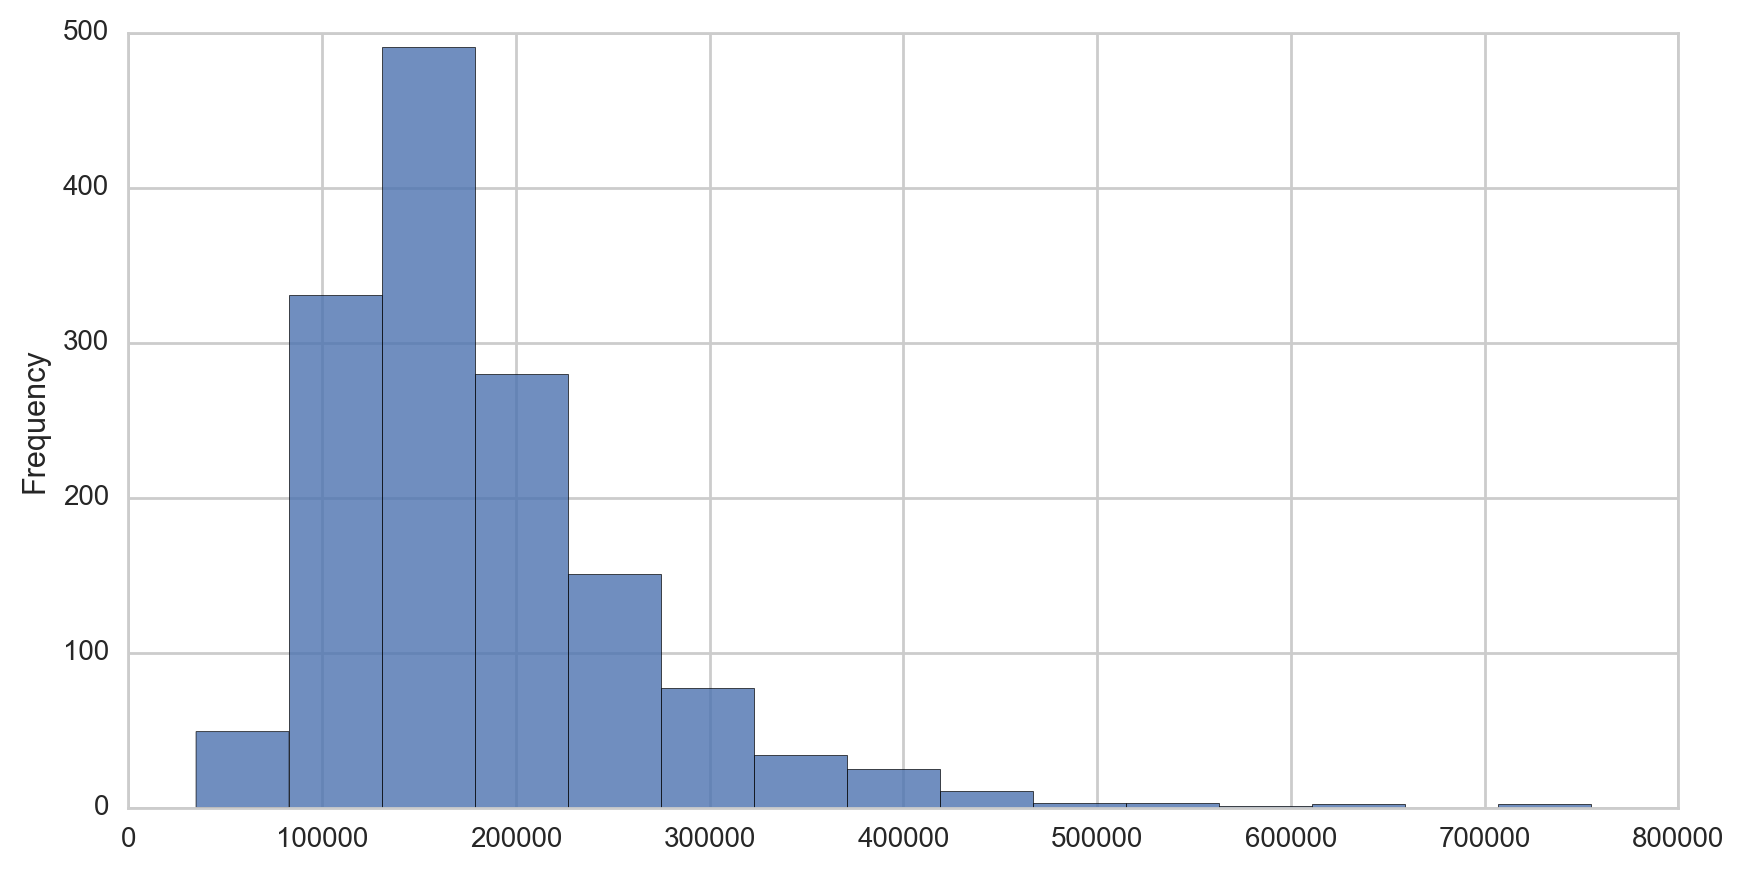

In [189]:
fig = plt.figure(figsize=(10,5))

house['SalePrice'].plot.hist(alpha=.8, bins=15)
print house.SalePrice.describe()

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

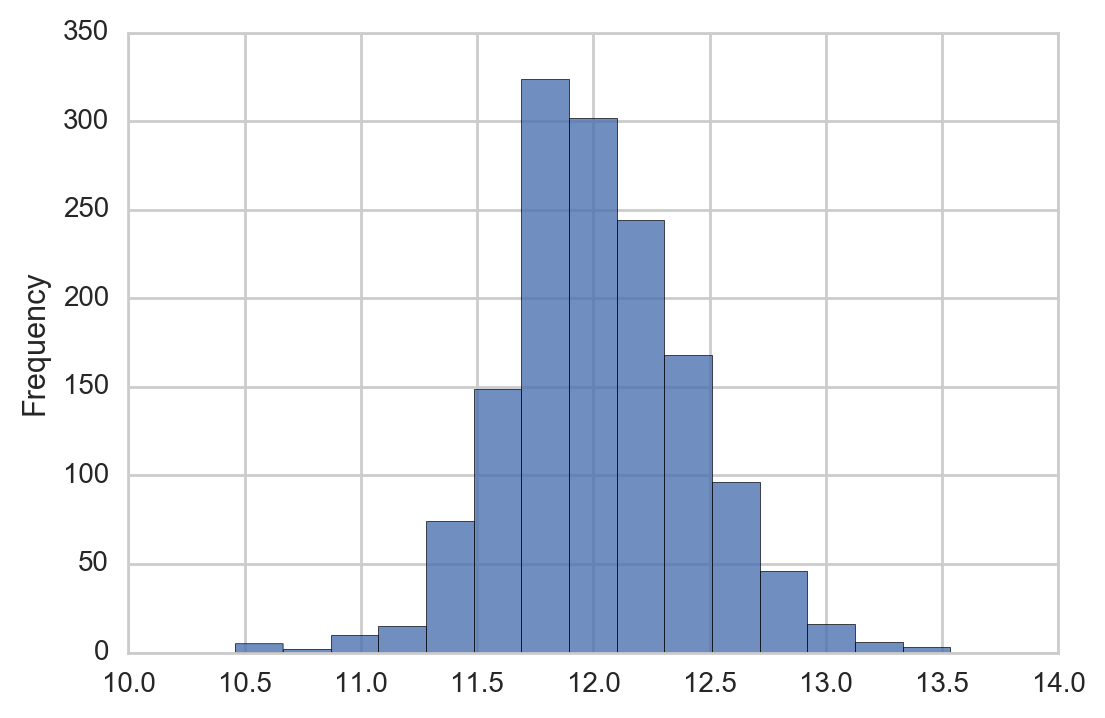

In [190]:
house['SalePrice_log'] = np.log(house['SalePrice'])
house['SalePrice_log'].plot.hist(alpha=.8, bins=15)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [191]:
#the correlation is negatively stronger if we calculate it with the transformed sale price which means that the 
#age is a better predicter of the original SalePrice

In [192]:
house['Age'] = house['YrSold'] - house['YearBuilt']

In [193]:
np.corrcoef(house['Age'], house['SalePrice'])

array([[ 1.        , -0.52335042],
       [-0.52335042,  1.        ]])

In [194]:
np.corrcoef(house['Age'], house['SalePrice_log'])

array([[ 1.        , -0.58729005],
       [-0.58729005,  1.        ]])

### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

In [195]:
#there seems to be a wider disbursement of points when looking at the plot with the transformed SalePrice which shows
#that the original SalePrice is better predicted using the age of the house

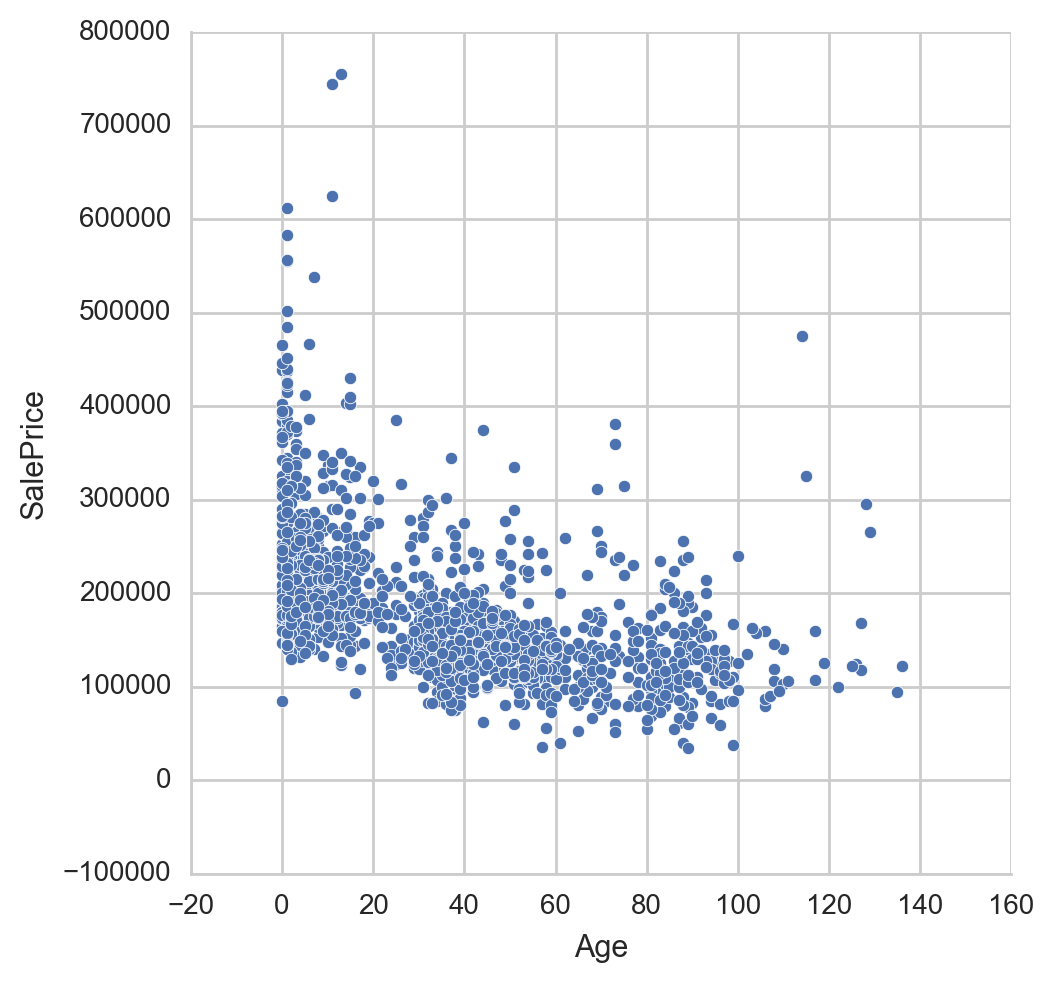

In [196]:
sns.pairplot(house, hue=None, x_vars='Age', y_vars='SalePrice', kind='scatter', size=5)

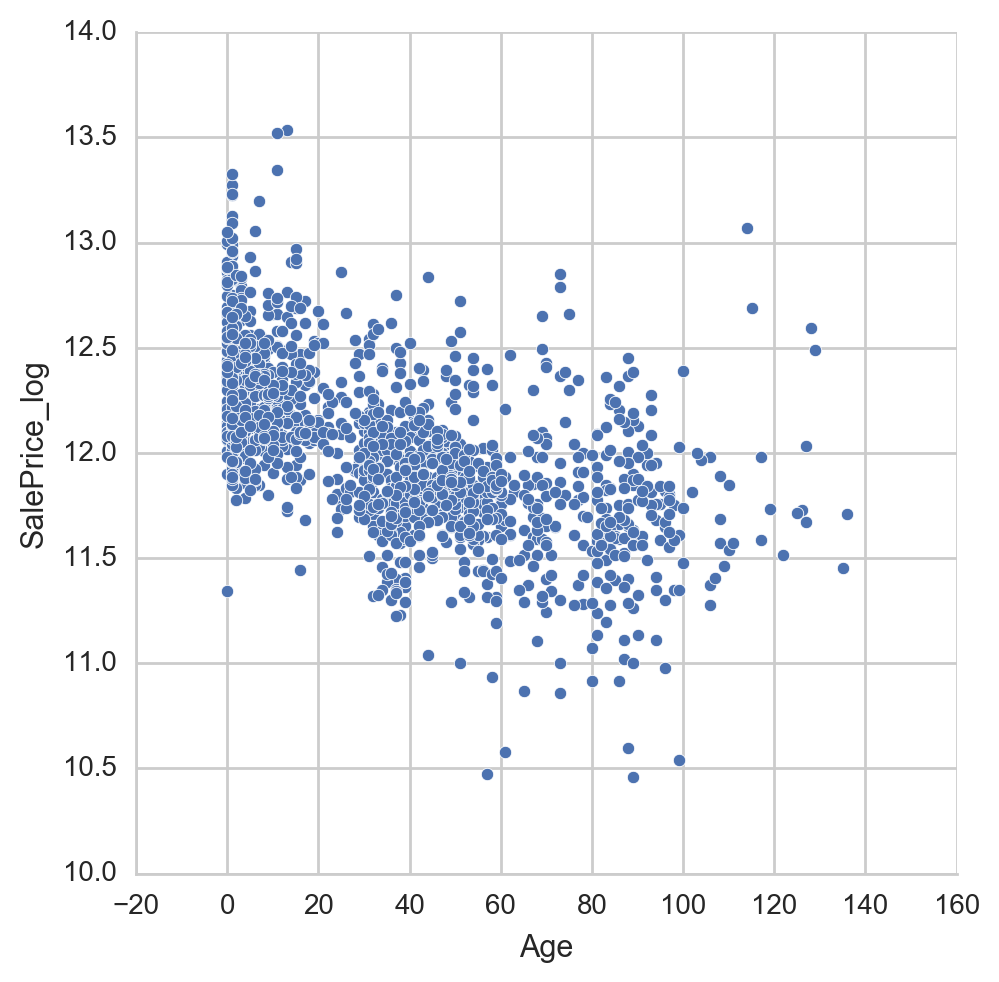

In [197]:
sns.pairplot(house, hue=None, x_vars='Age', y_vars='SalePrice_log', kind='scatter', size=5)

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

In [198]:
#the relationship is that the larger the total livable square feet is, the higher the price of the house will be
#(for most cases)

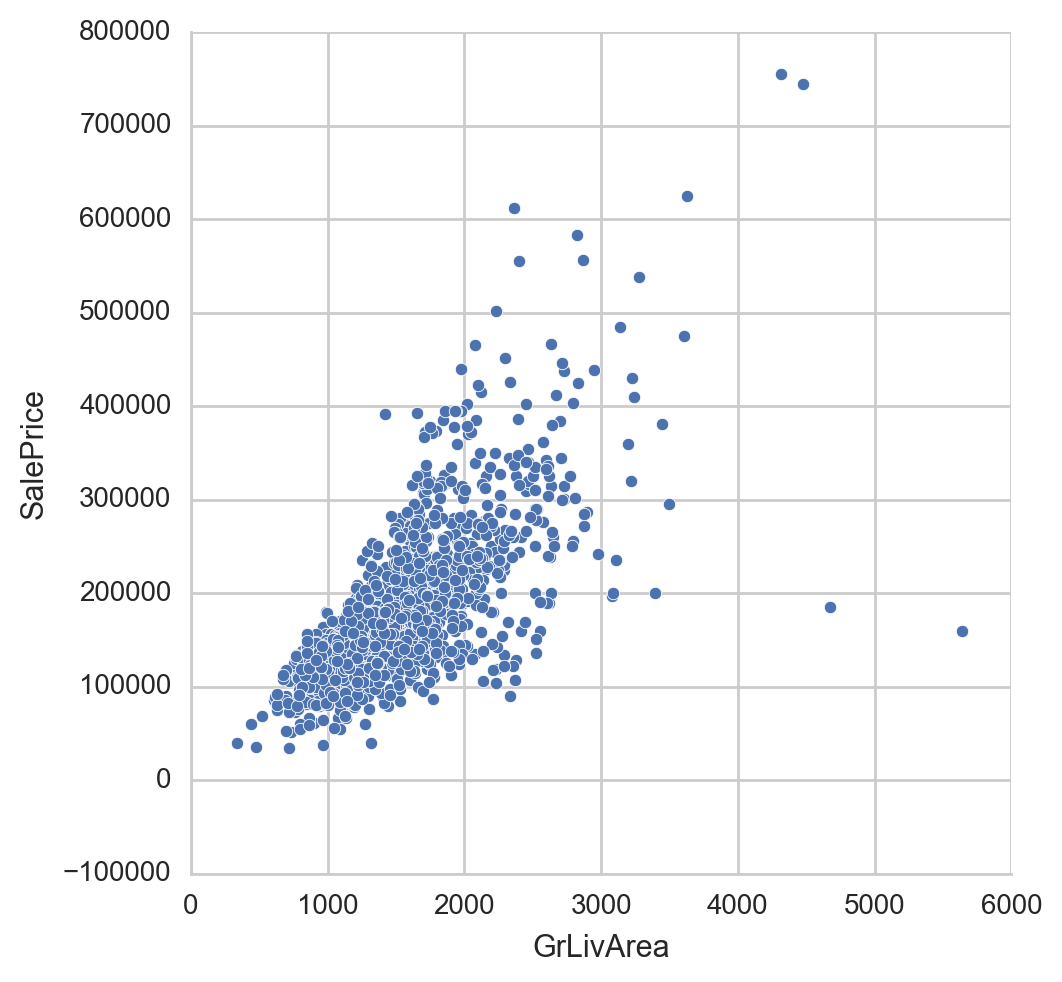

In [199]:
sns.pairplot(house, hue=None, x_vars= 'GrLivArea', y_vars= 'SalePrice', kind='scatter', size=5)

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

In [200]:
#I chose to plot the continuous variables 'WoodDeckSF' and 'SalePrice' because I thought that if a house were to have 
#a deck to begin with, it would have a strong correlation with sale price. Also thought it would be interesting to 
#see if bigger decks meant higher price, since usually if a house has a large deck it's in a more rural area where the 
#price of housing is typically less than in a big city 

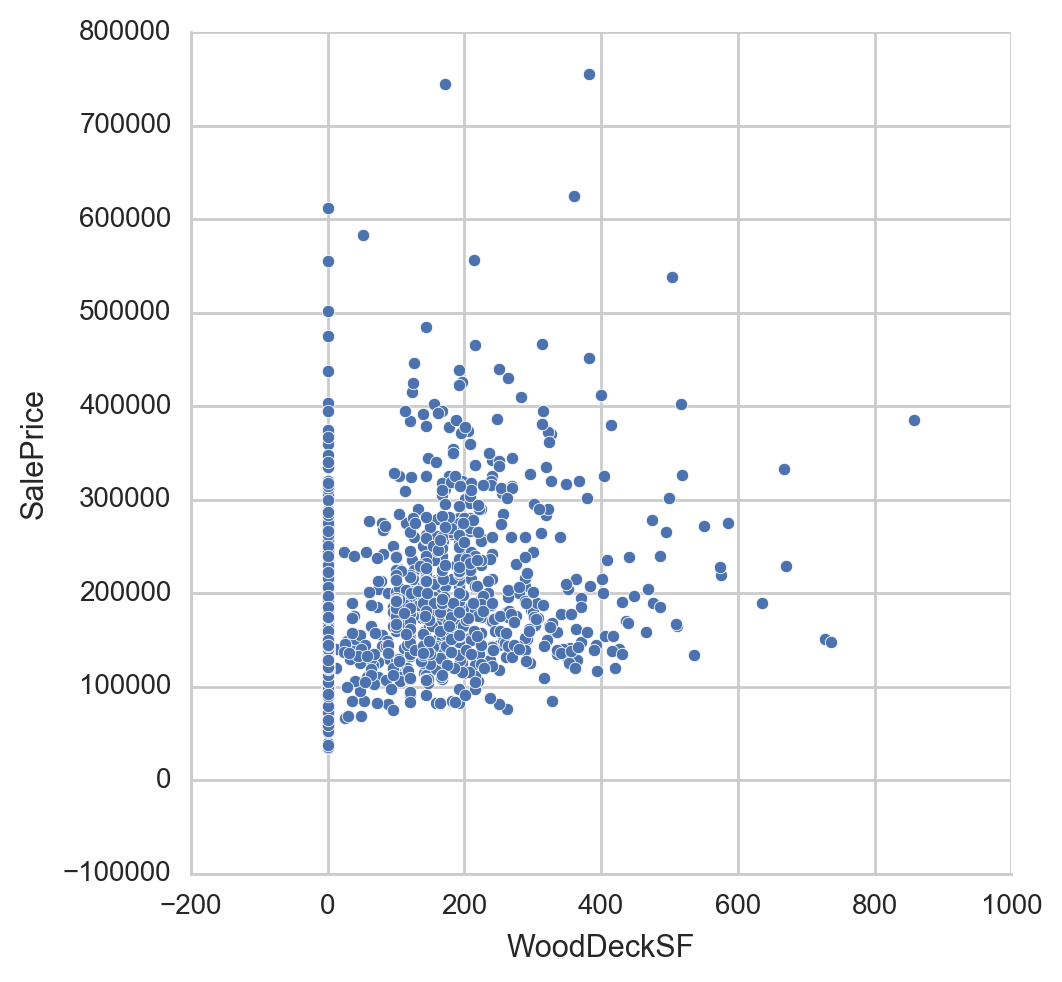

In [201]:
sns.pairplot(house, hue=None, x_vars='WoodDeckSF', y_vars='SalePrice', kind='scatter', size=5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [202]:
house = house[house.MSZoning != 'C']
house = house[house.MSZoning != 'C (all)']

In [203]:
house['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [204]:
house.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1443
MiscFeature     1398
Alley           1361
Fence           1172
FireplaceQu      681
LotFrontage      259
GarageQual        79
GarageCond        79
GarageType        79
GarageYrBlt       79
GarageFinish      79
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [205]:
#I dropped the following variables from the dataset since I don't believe they are good predictors of sale price and 
#thus don't want them to incorrectly affect our regression model
house.isnull().sum().sort_values(ascending=False)
house.drop('Alley', 1, inplace=True) 
house.drop('GarageFinish', 1, inplace=True)
house.drop('GarageYrBlt', 1, inplace=True)
house.drop('BsmtFinType2', 1, inplace=True)
house.drop('BsmtExposure', 1, inplace=True)
house.drop('BsmtFinType1', 1, inplace=True)
house.drop('PoolQC', 1, inplace=True)
house.drop('Fence', 1, inplace=True)
house.drop('MiscFeature', 1, inplace=True)
house.drop('MasVnrType', 1, inplace=True)
house.drop('FireplaceQu', 1, inplace=True)
house.drop('LotFrontage', 1, inplace=True)
house.drop('GarageQual', 1, inplace=True)
house.drop('GarageCond', 1, inplace=True)
house.drop('GarageType', 1, inplace=True)
house.drop('BsmtCond', 1, inplace=True)
house.drop('BsmtQual', 1, inplace=True)
house.drop('MasVnrArea', 1, inplace=True)
house.drop('Electrical', 1, inplace=True)
house.drop('Id', 1, inplace=True)

### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [206]:
#please see 4.2 for reasoning behind dropping columns

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

In [ ]:
#I notice by looking at the correlation matrix that Sale price is largely affected by square footage as well as age, 
#and different quality measurements 

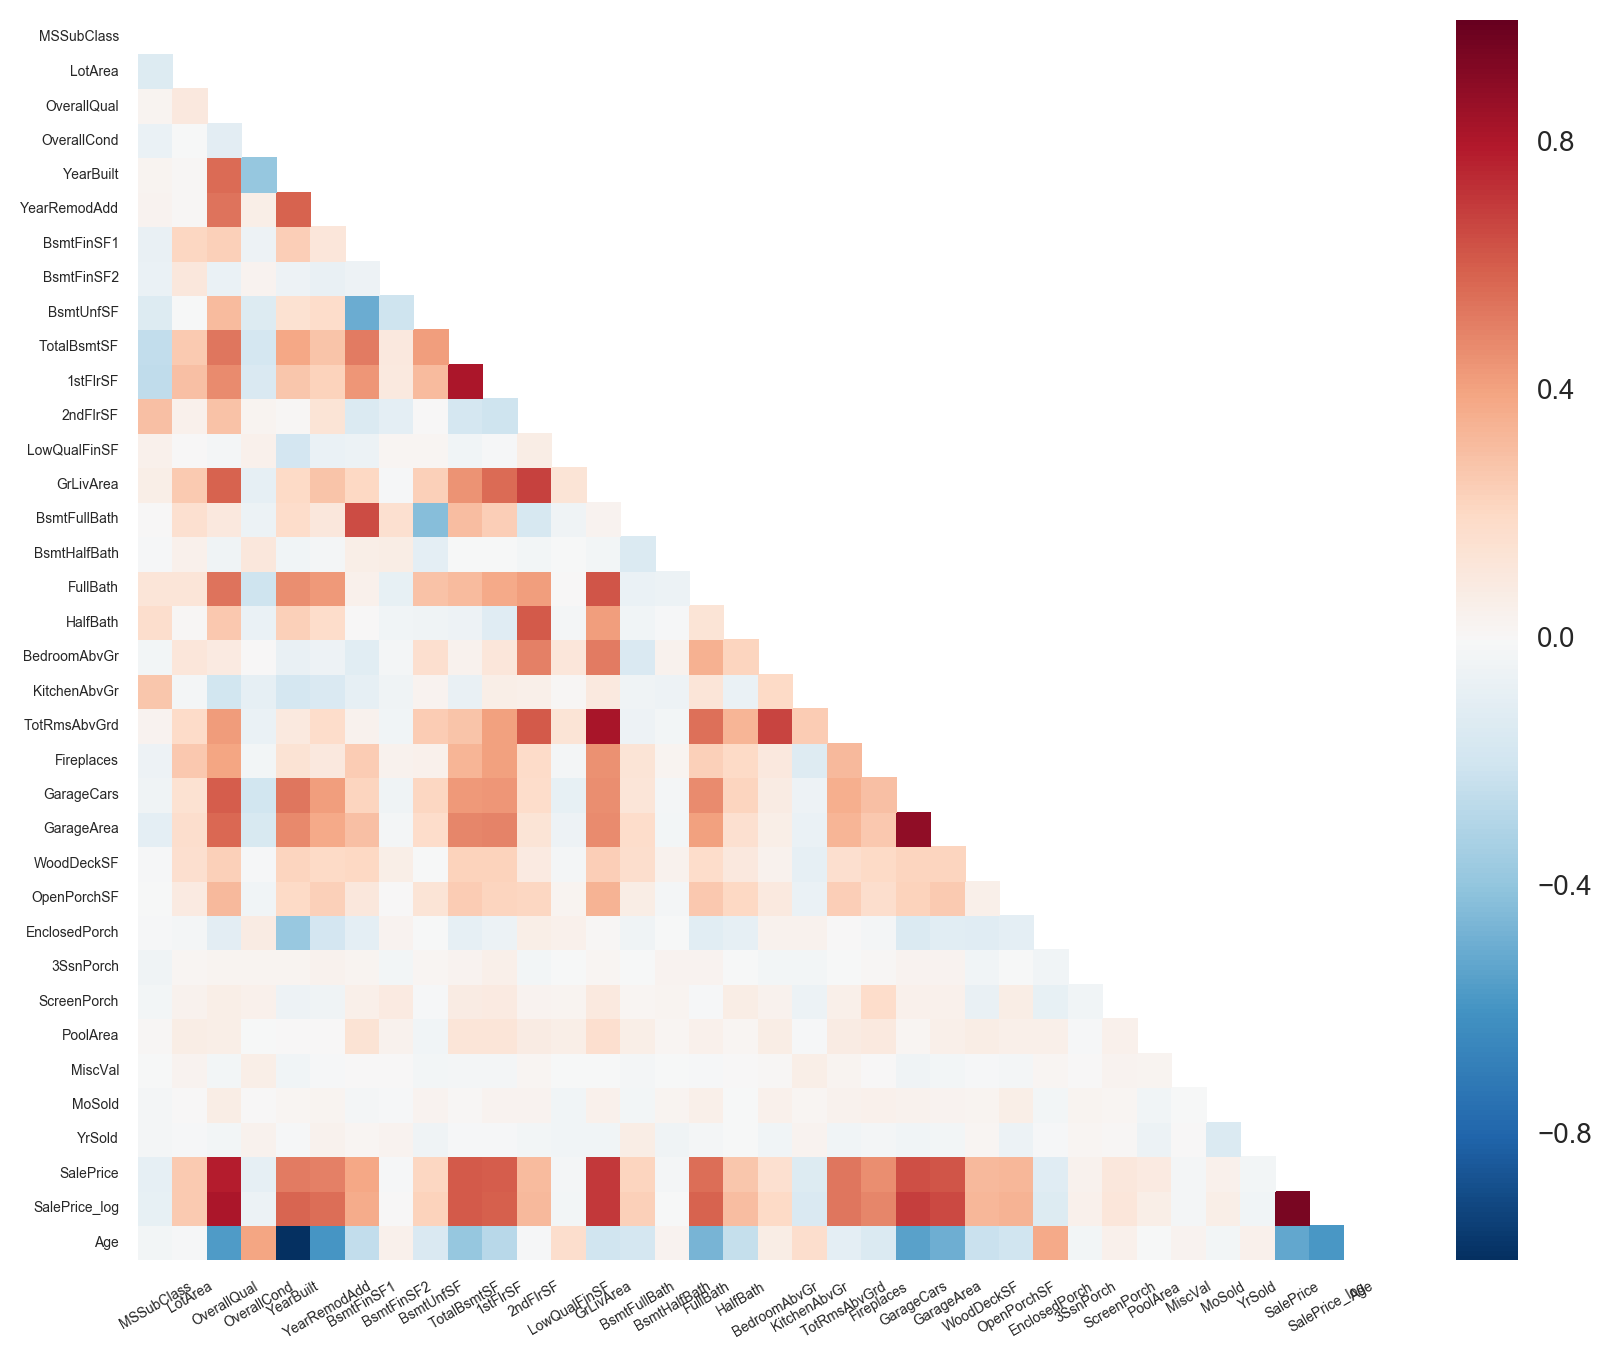

In [176]:
def correlation_heat_map(df):
    corrs = house.corr()
    plt.rcParams['figure.figsize']=(10,8)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=False)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=5, rotation=0)
    plt.show()
    
correlation_heat_map(house)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

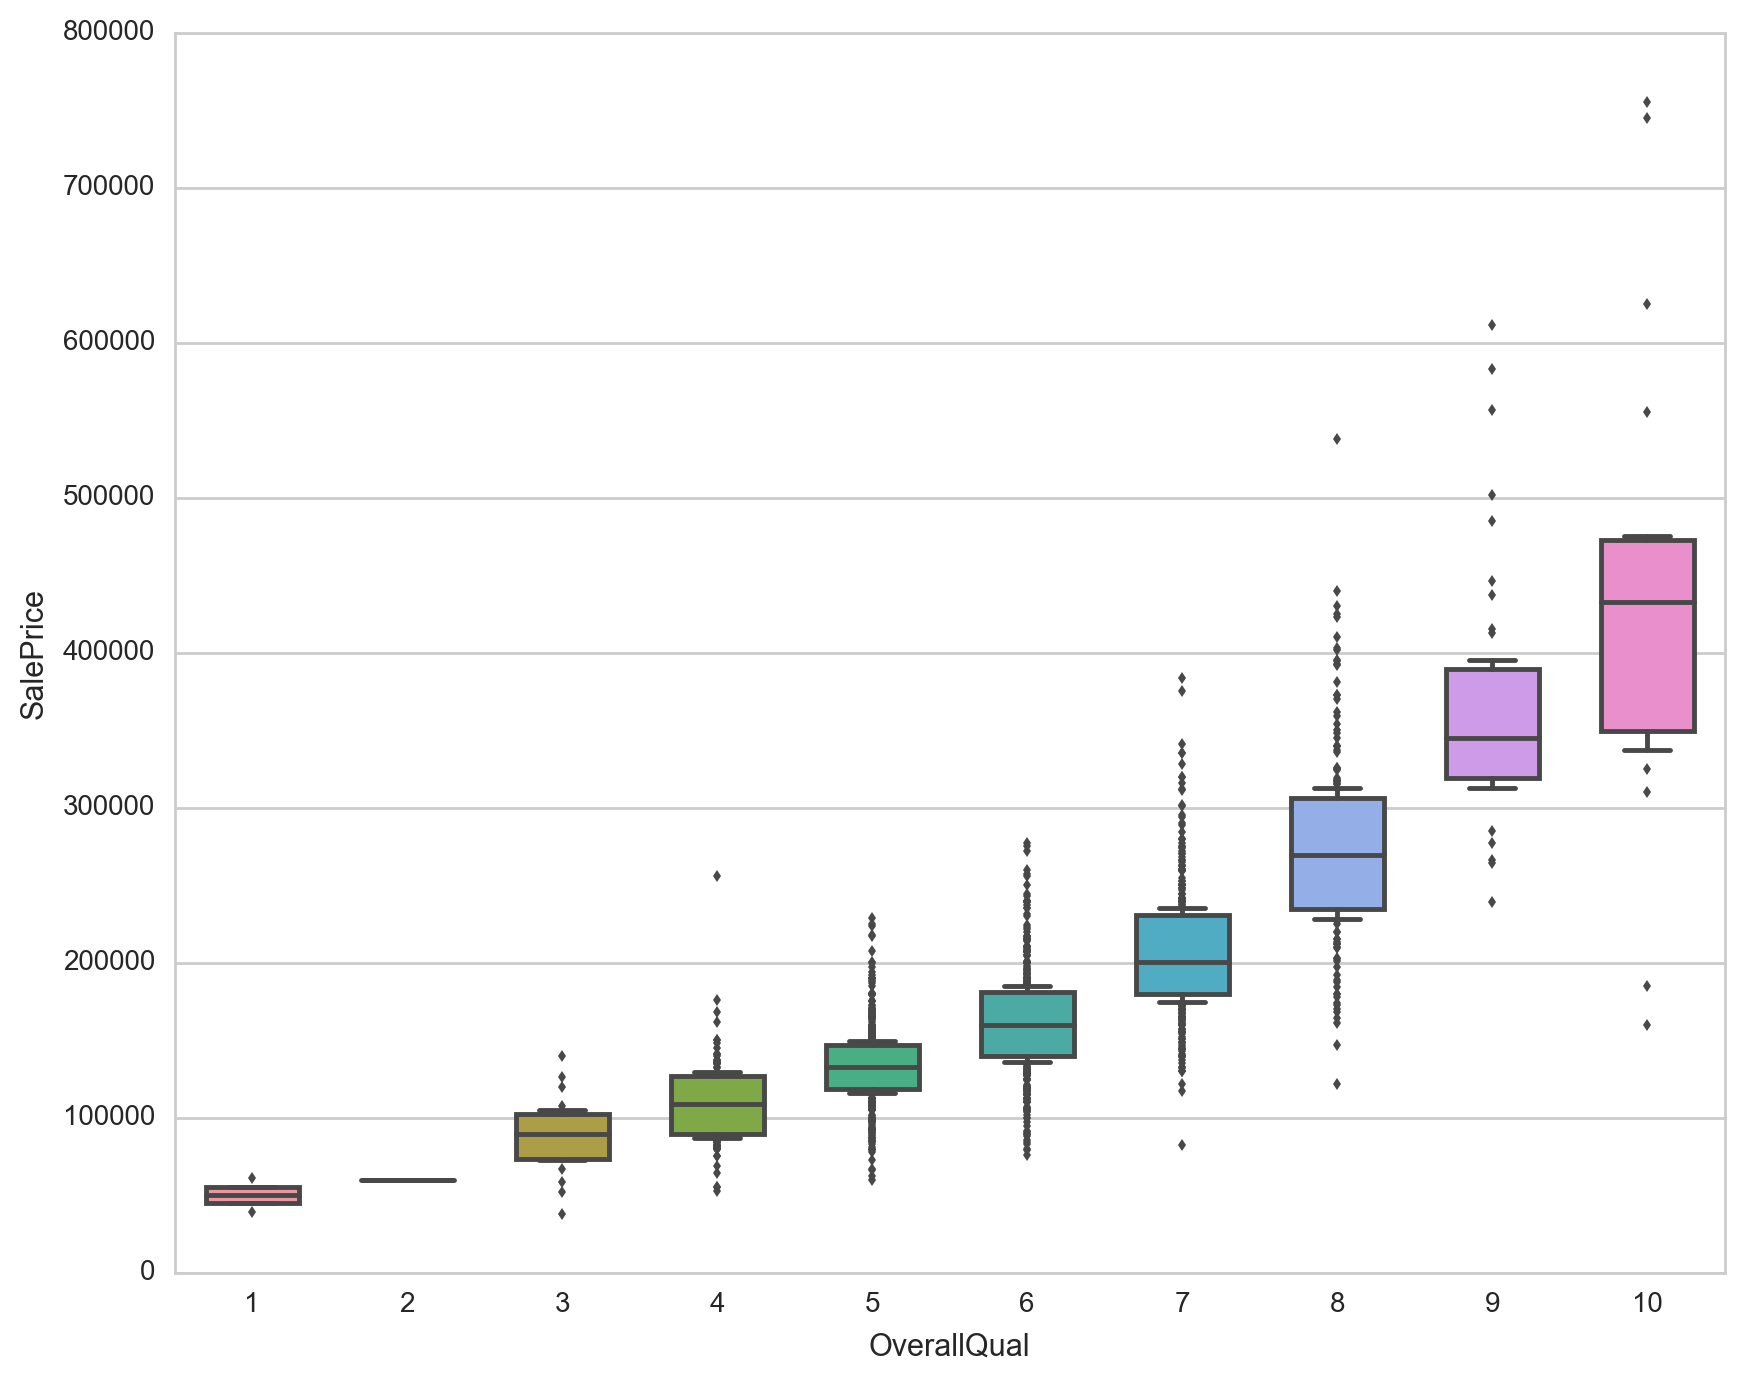

In [177]:
#Saleprice by overall quality of the property
sns.boxplot(x='OverallQual', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

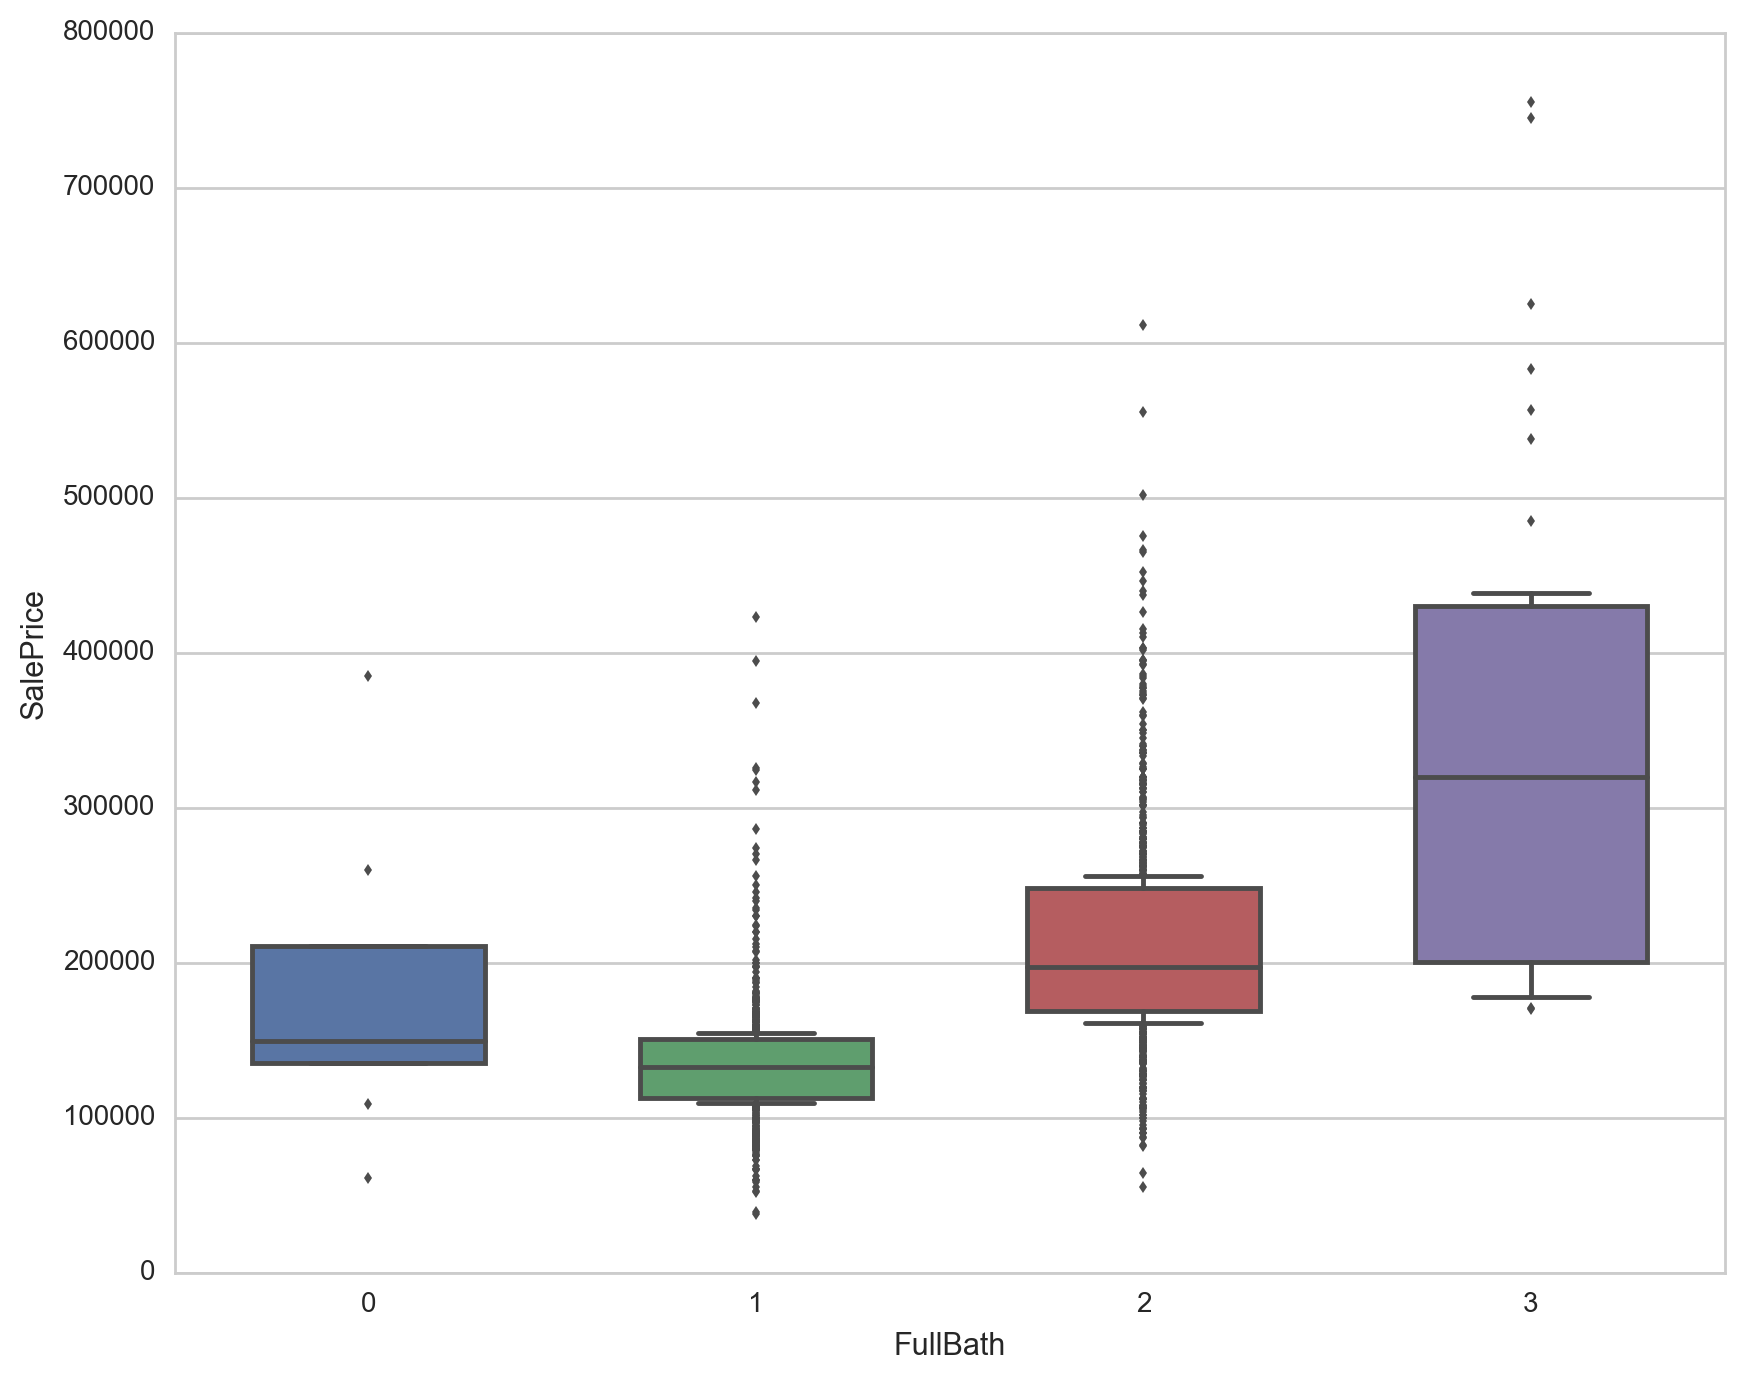

In [180]:
#SalePrice by number of full bathrooms on the property
sns.boxplot(x='FullBath', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

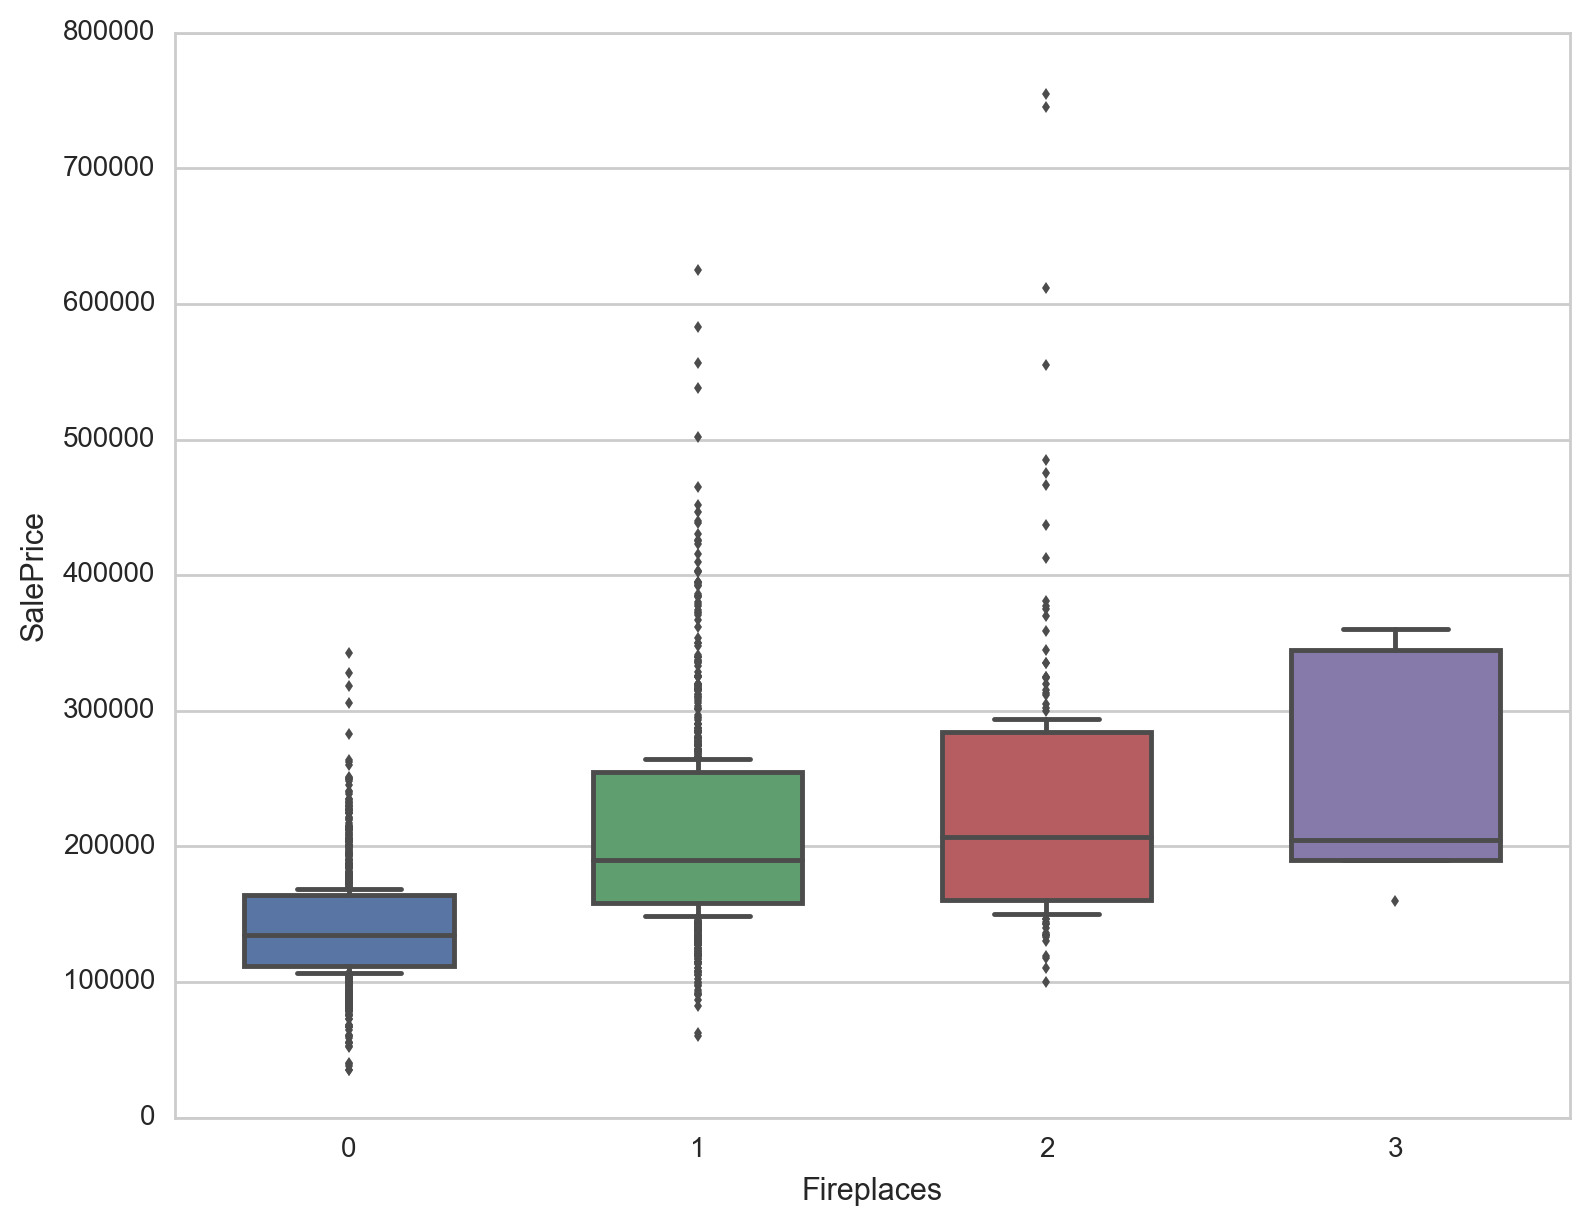

In [20]:
#SalePrice by number of fireplaces
sns.boxplot(x='Fireplaces', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

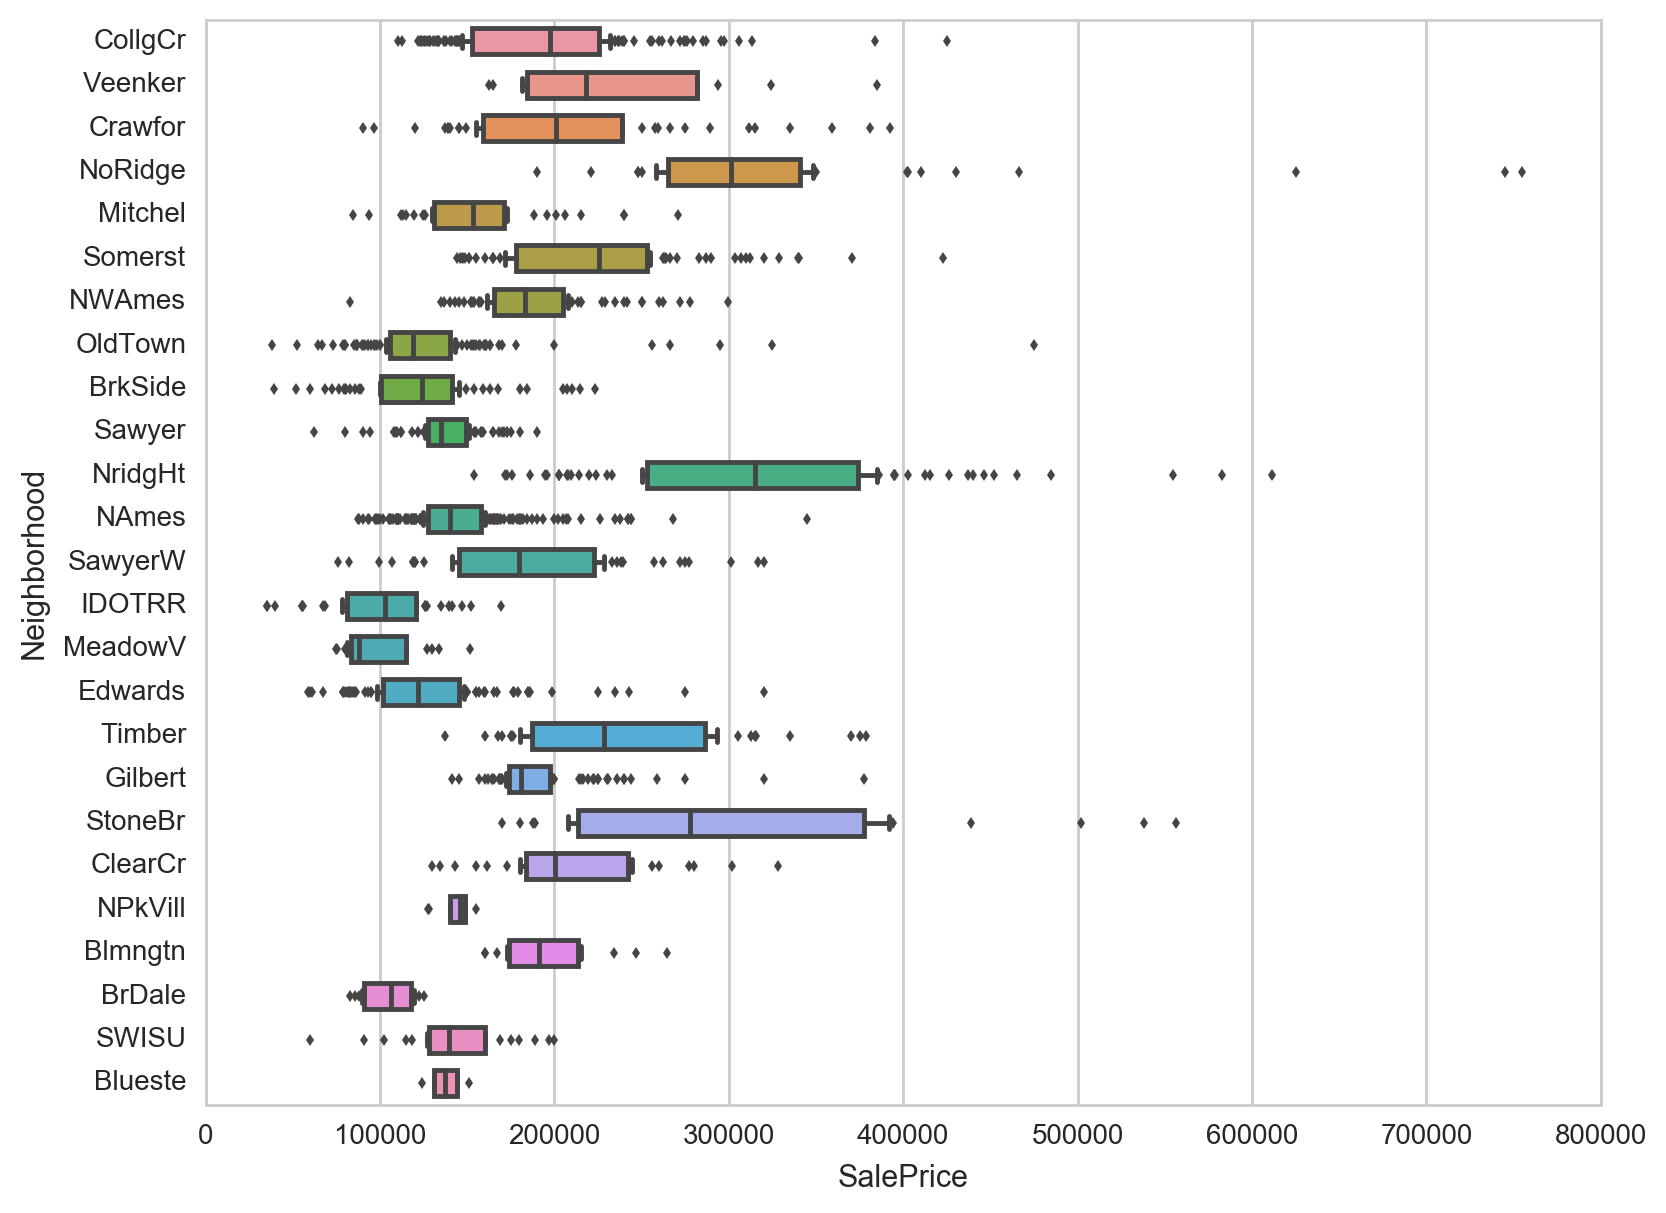

In [21]:
#SalePrice by Neighborhood
sns.boxplot(x='SalePrice', y='Neighborhood', hue=None, data=house, width=.6, whis=.1, fliersize=3)

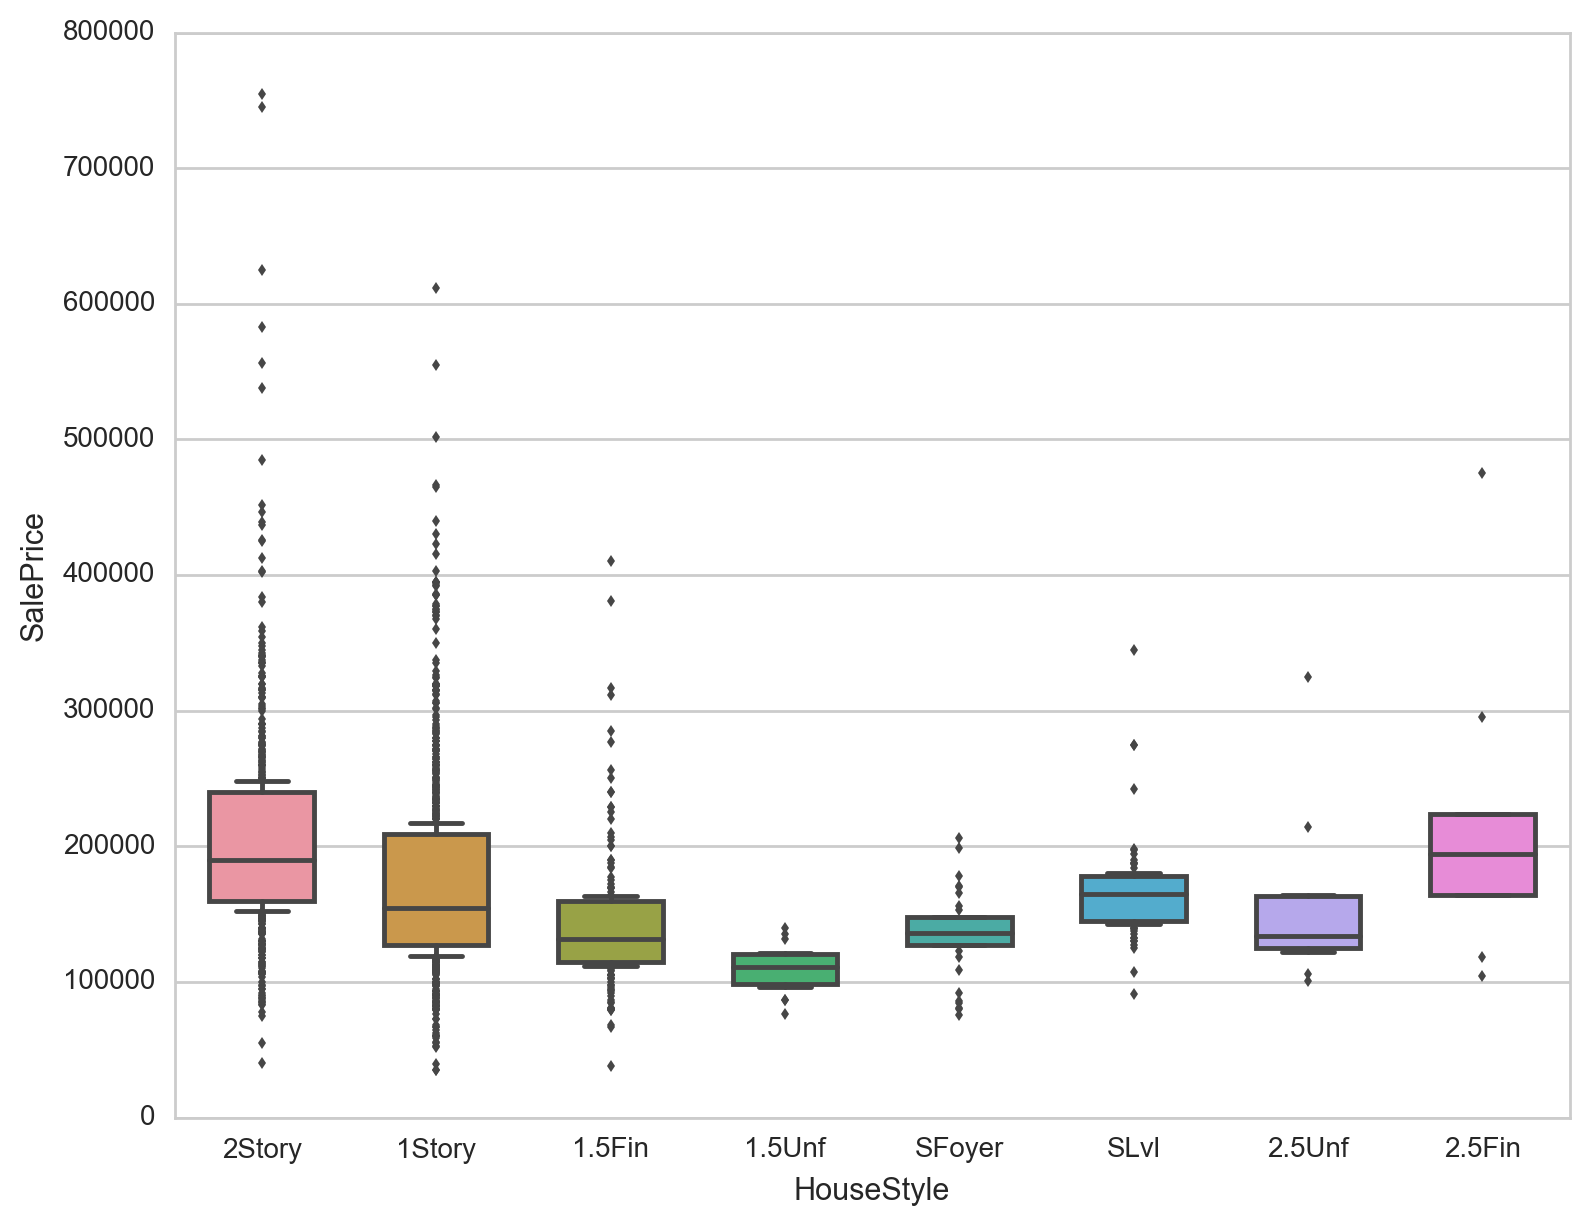

In [22]:
#Sale price by style of house
sns.boxplot(x='HouseStyle', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

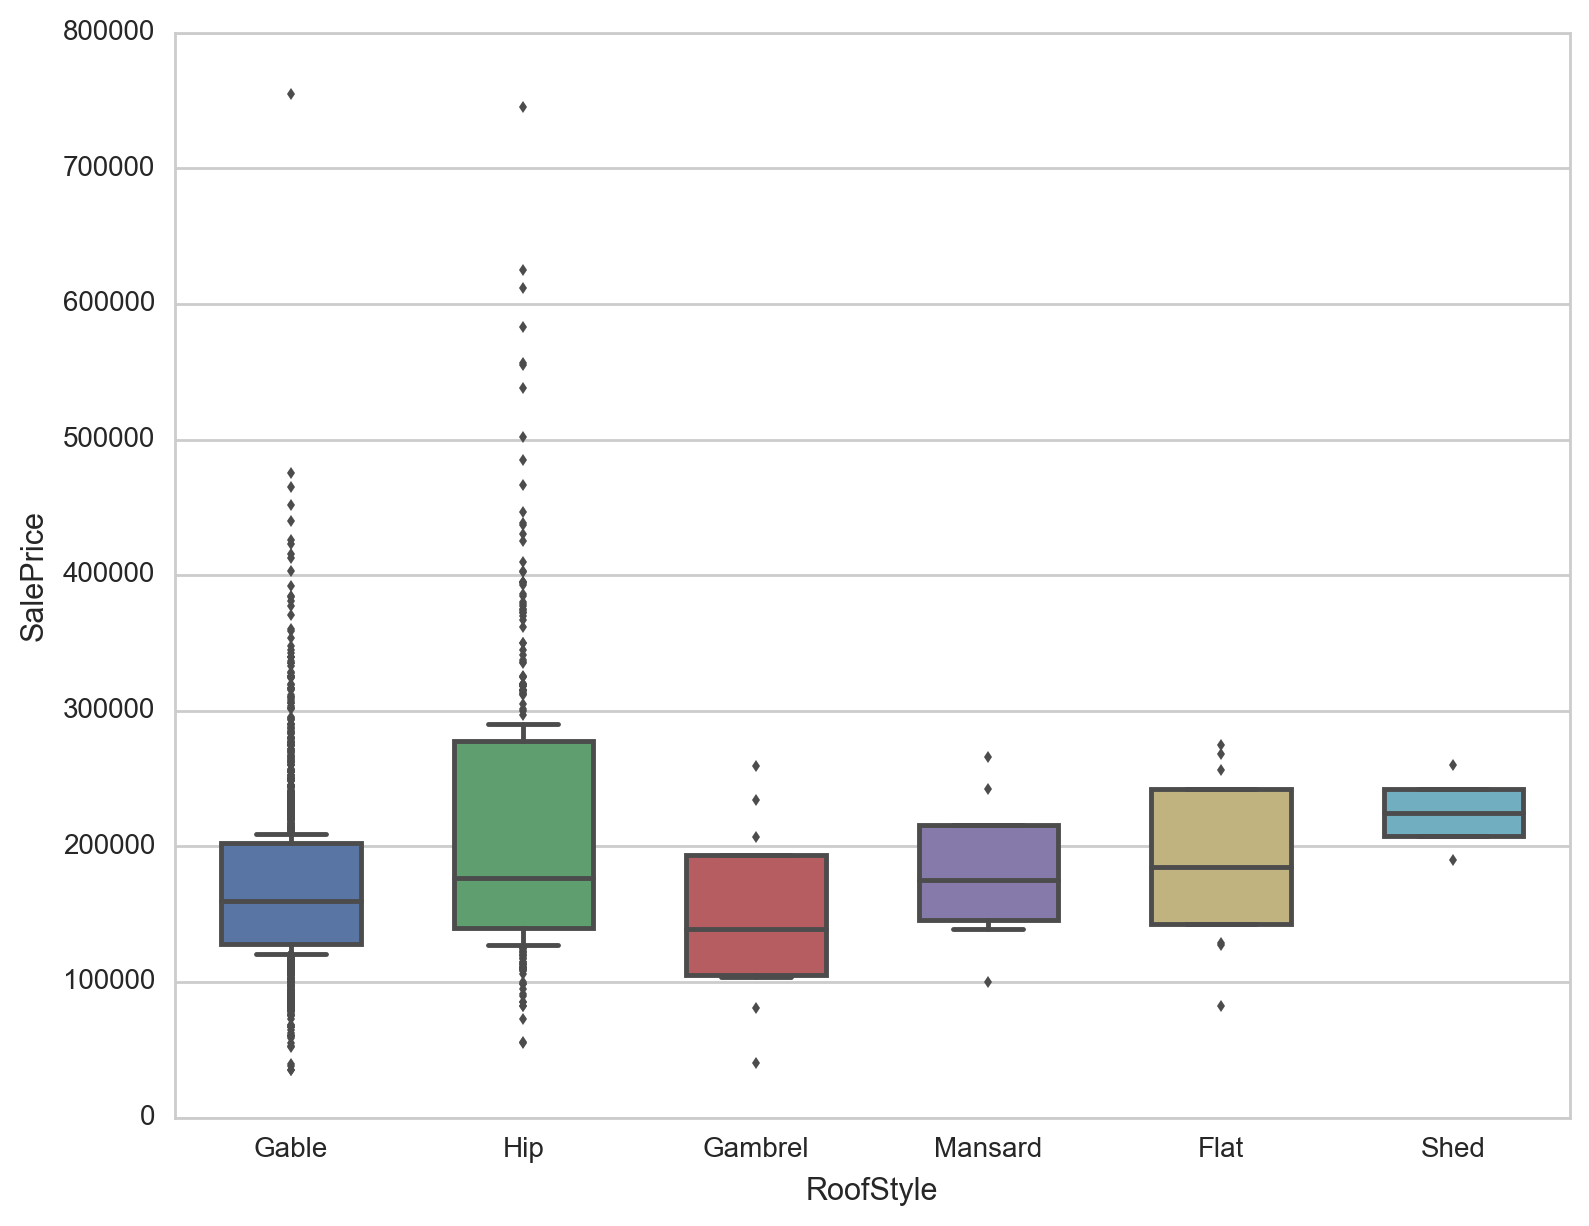

In [24]:
#Sale price by style of roof
sns.boxplot(x='RoofStyle', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

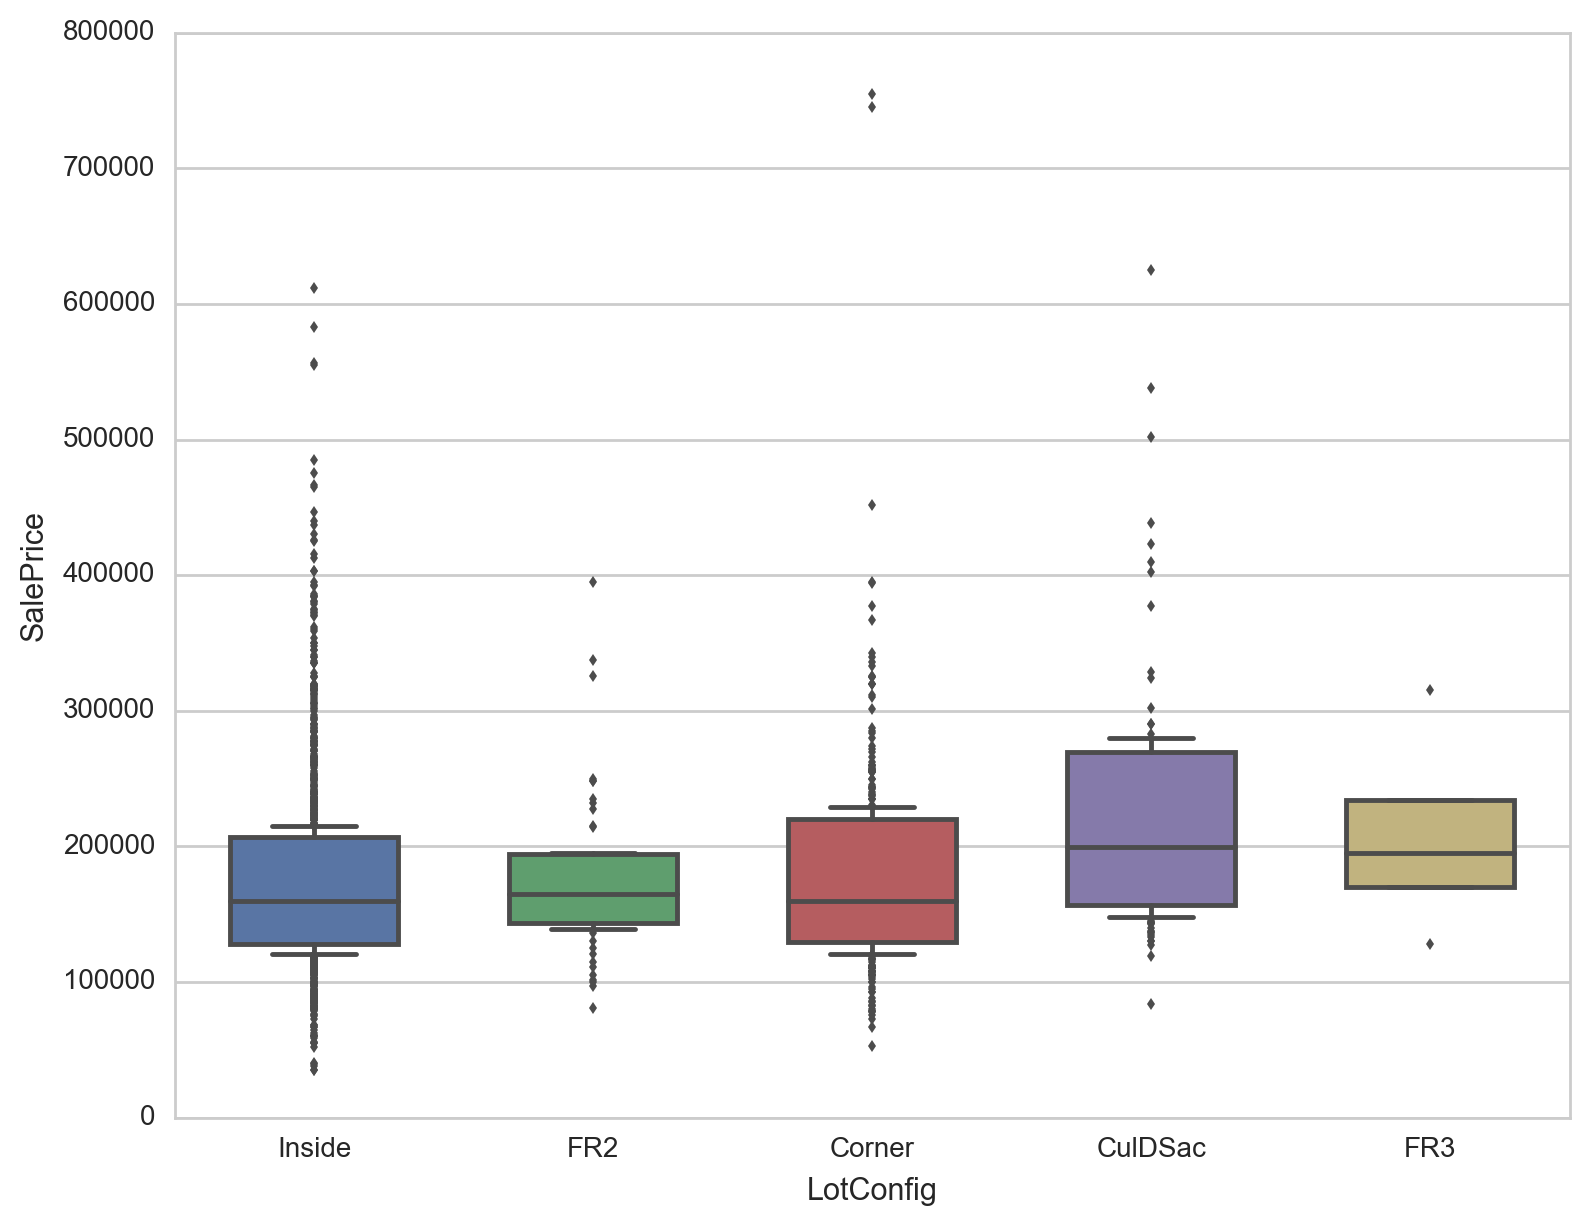

In [25]:
#Sale price by lot configuration
sns.boxplot(x='LotConfig', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

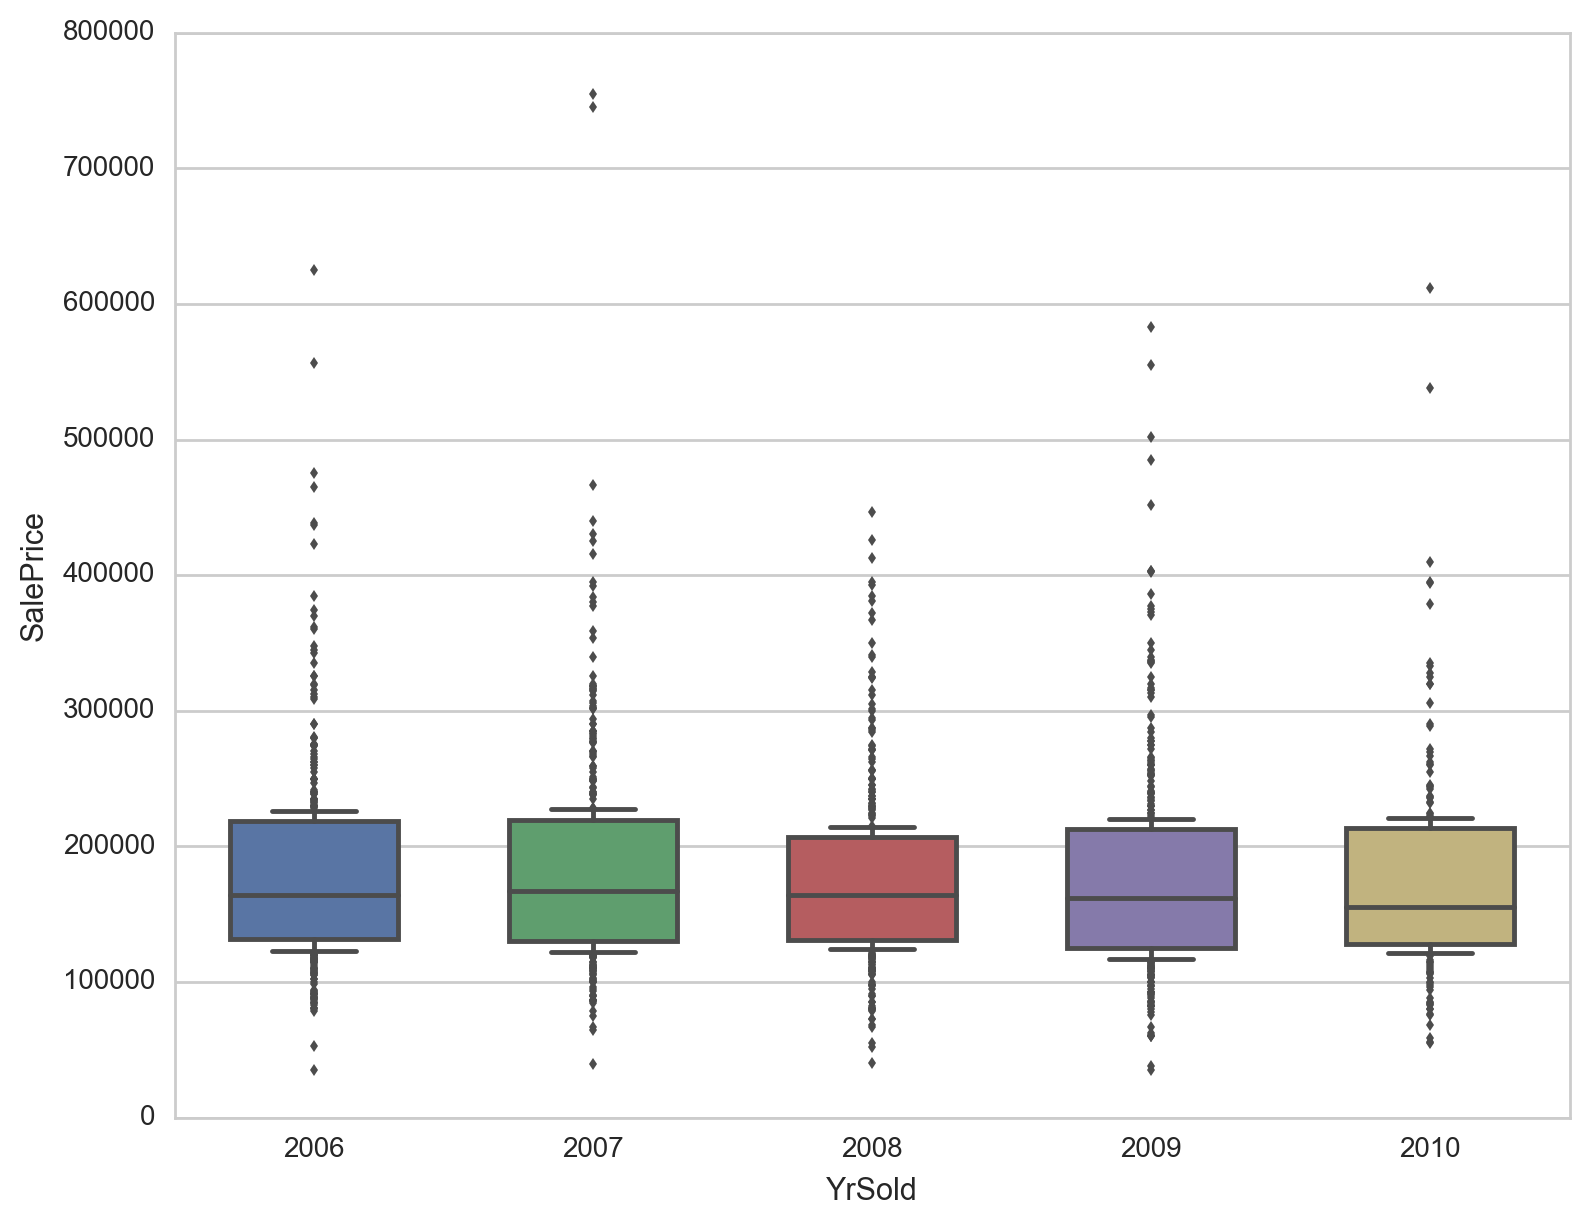

In [26]:
#Sale price by year sold
sns.boxplot(x='YrSold', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

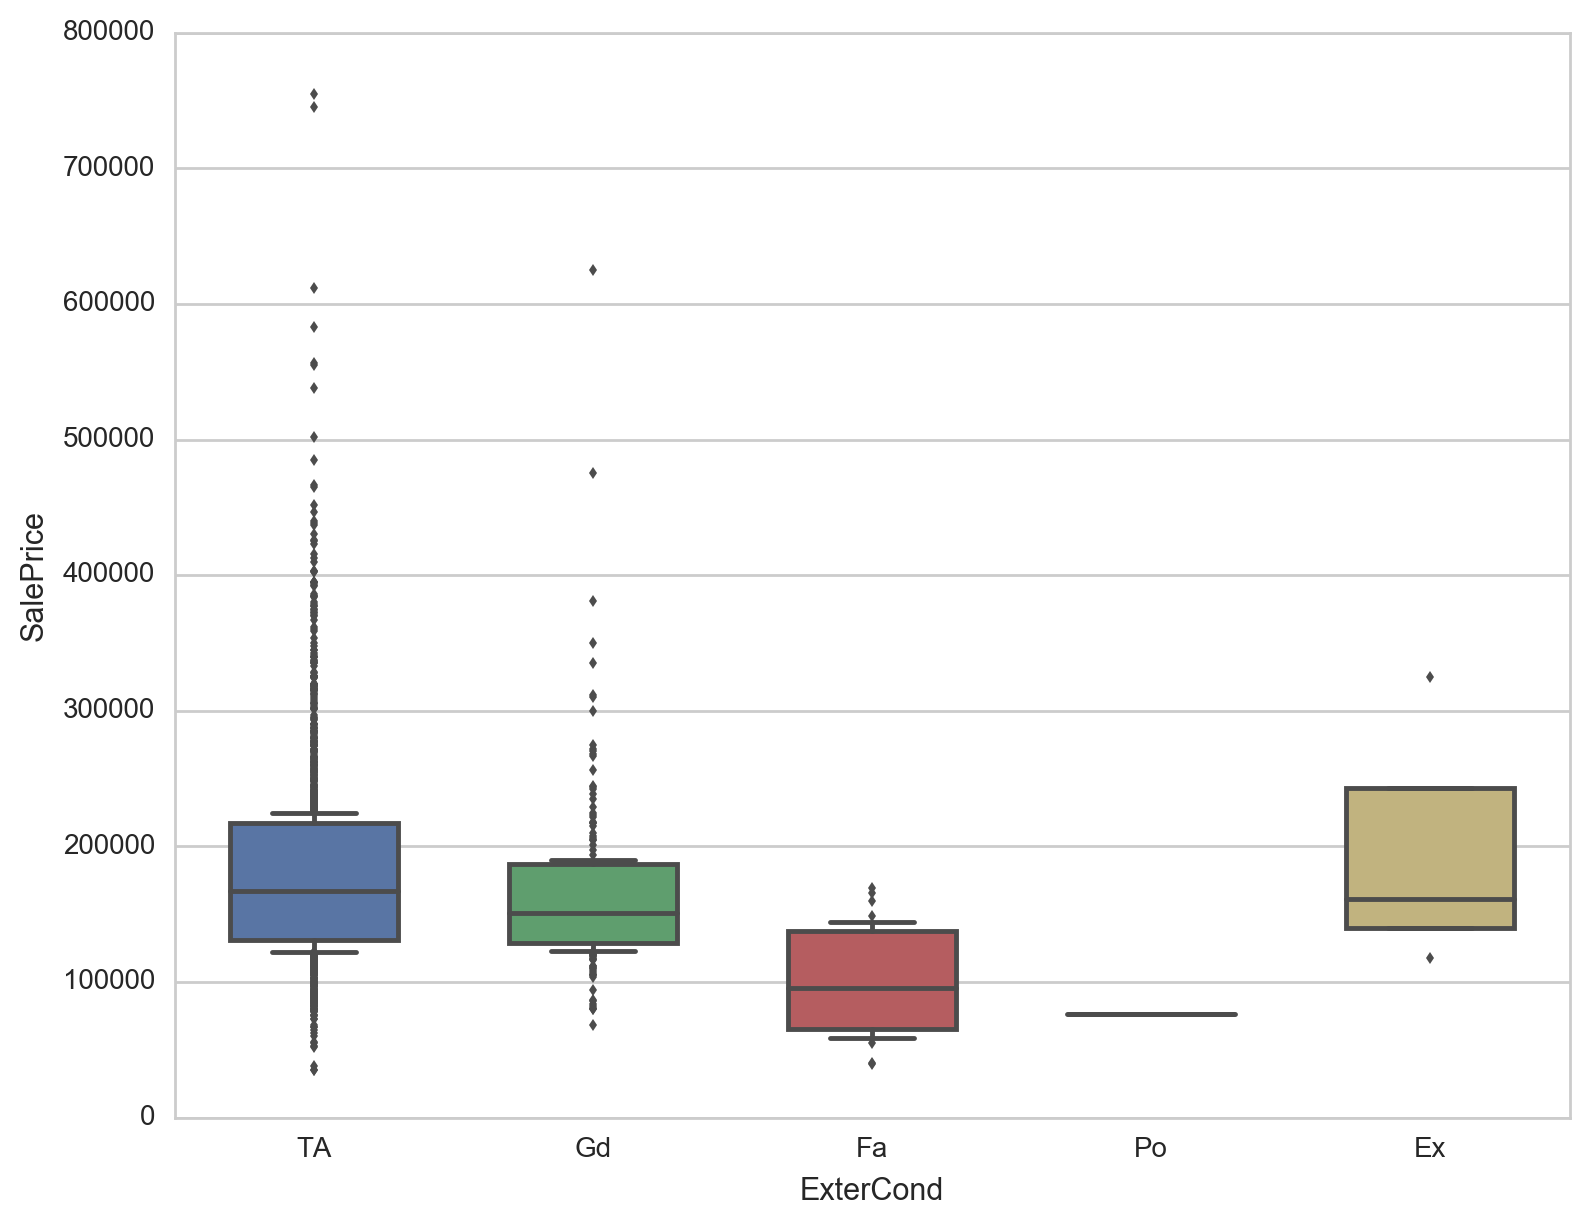

In [27]:
#Sale price by the condition of the exterior
sns.boxplot(x='ExterCond', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

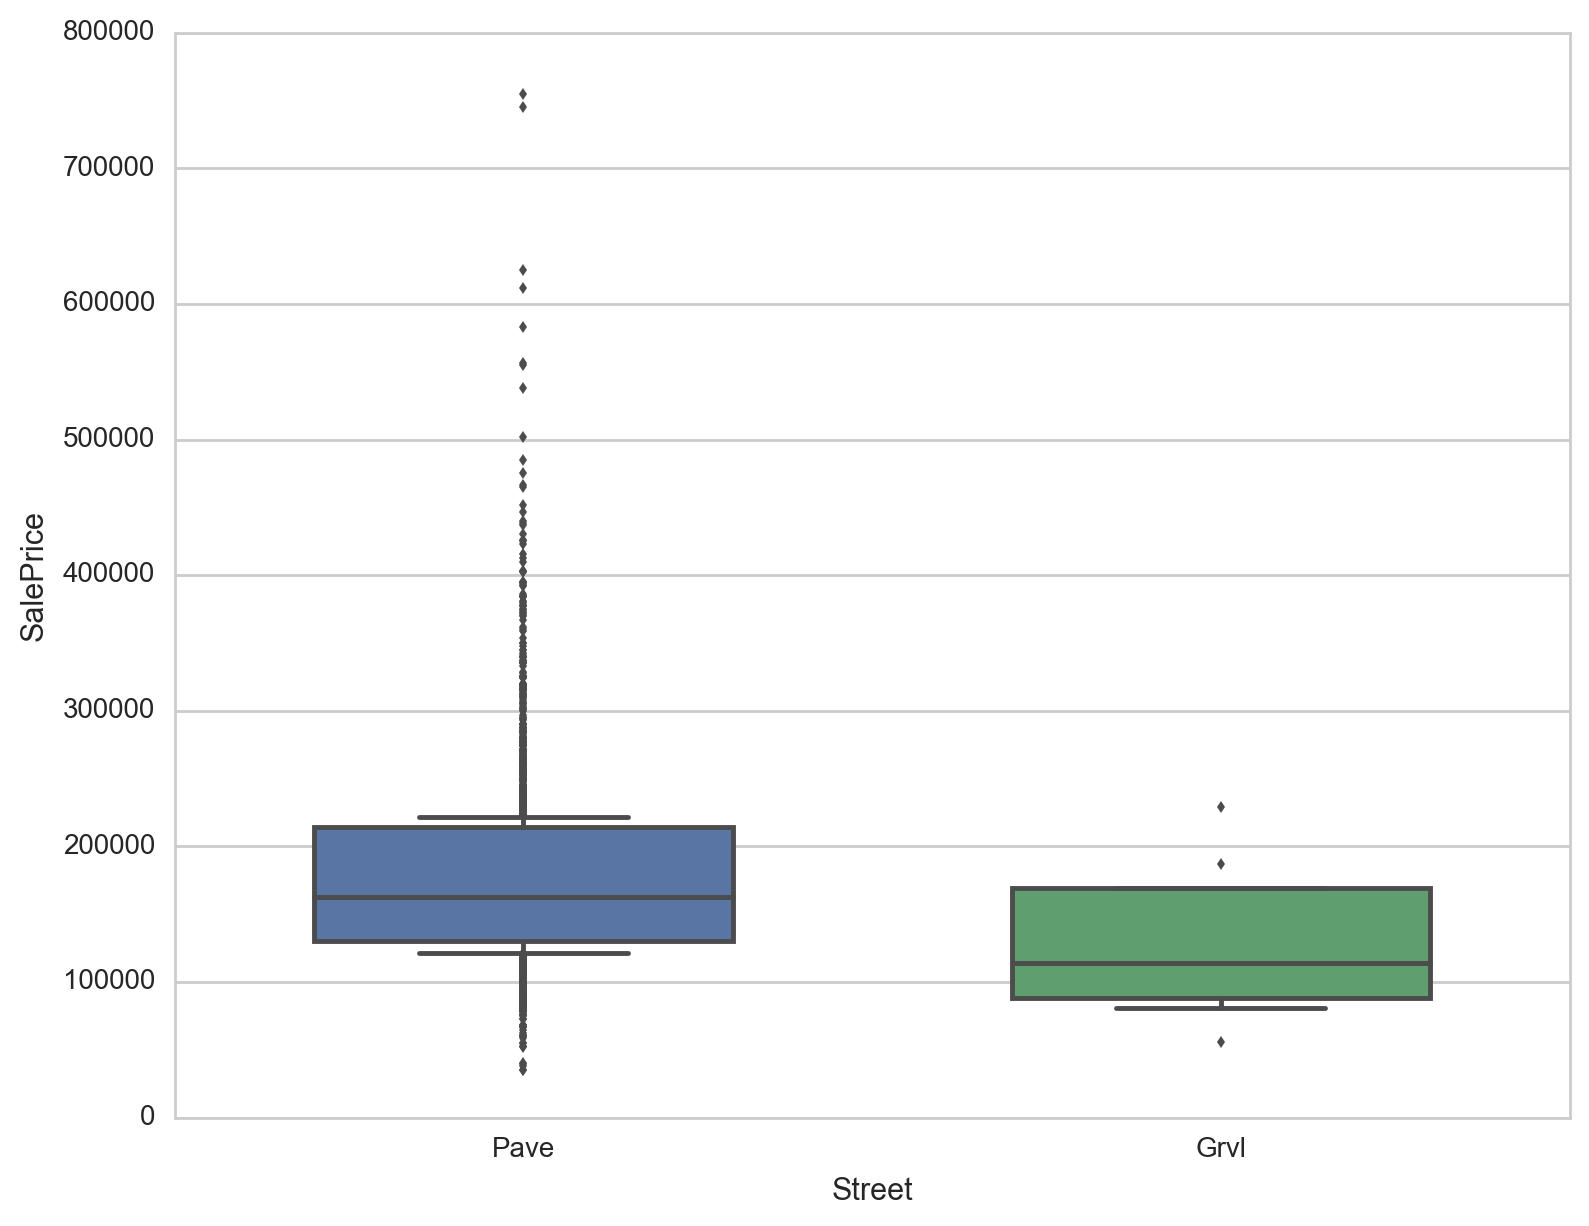

In [28]:
#Sale price by street
sns.boxplot(x='Street', y='SalePrice', hue=None, data=house, width=.6, whis=.1, fliersize=3)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as pl

In [30]:
X = house['GrLivArea']
y = house['SalePrice']
model = sm.OLS(y, X)
results = model.fit()
predictions = results.predict(X)

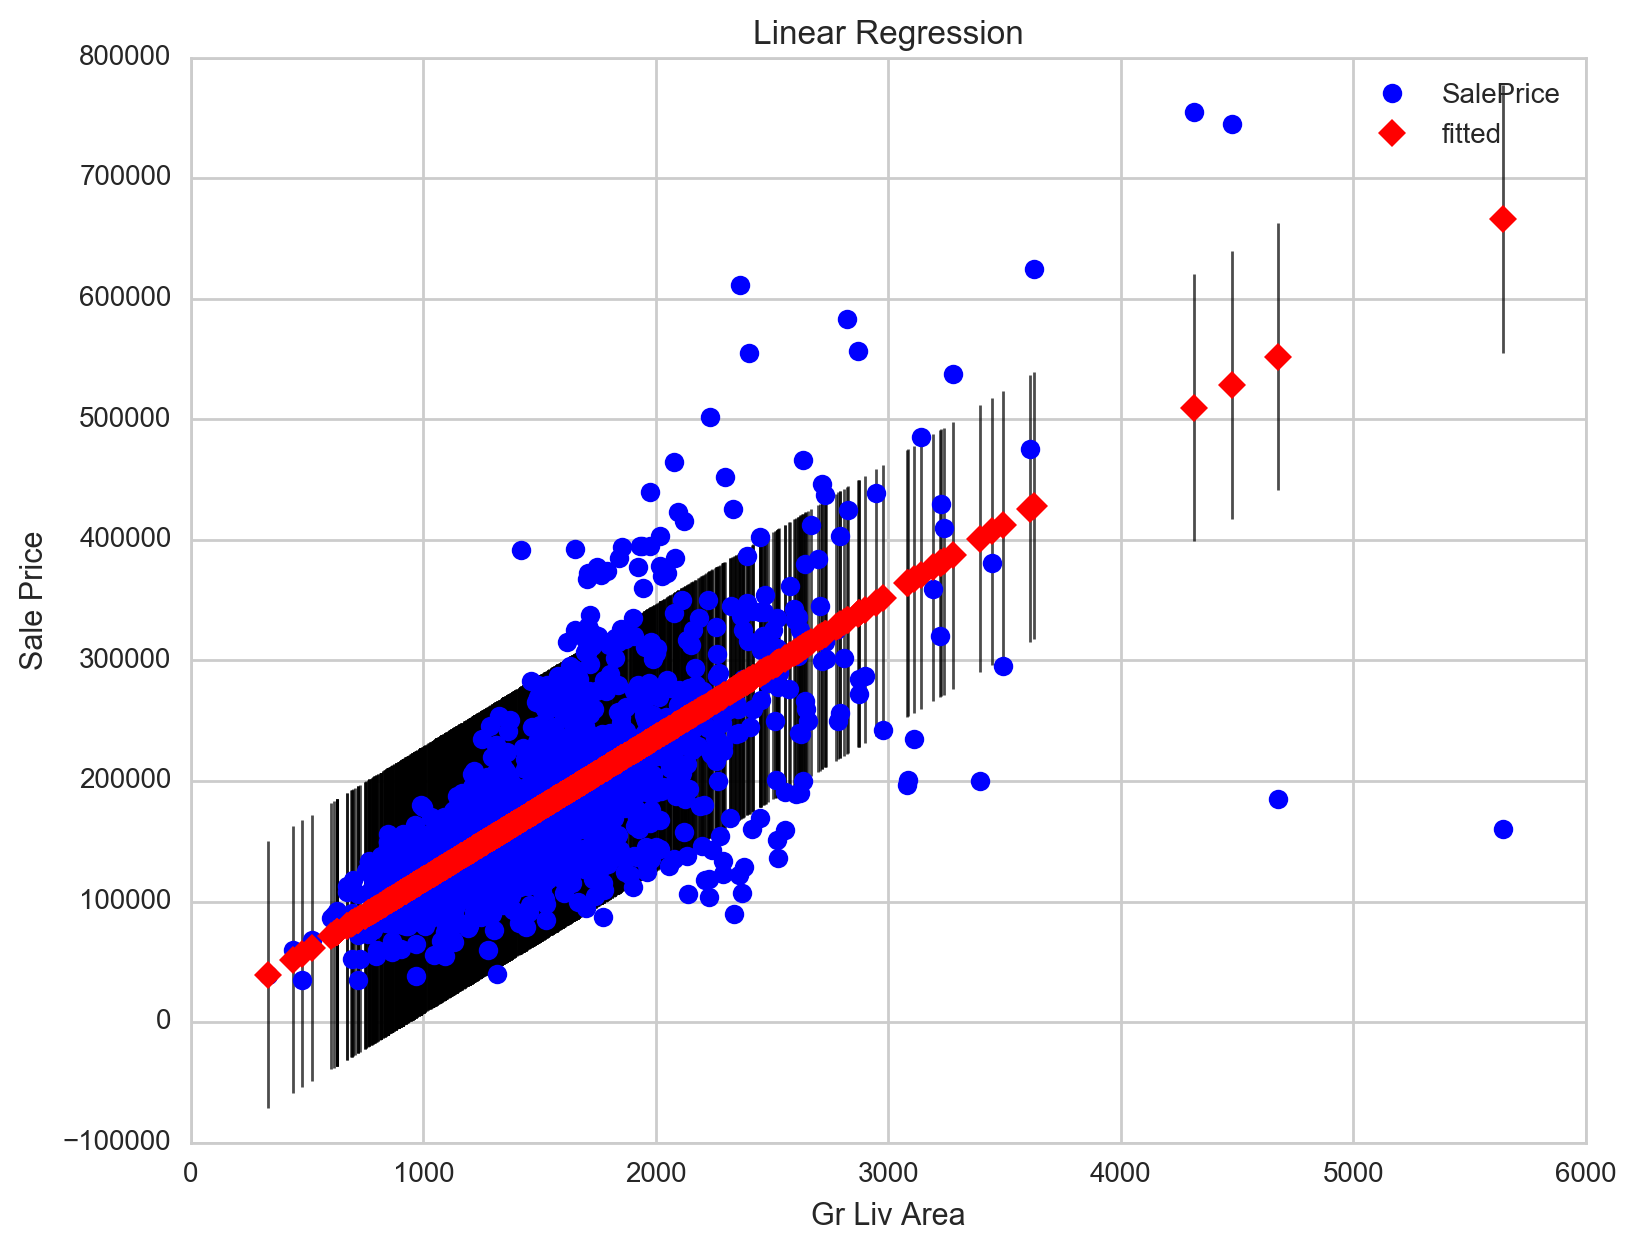

In [31]:
#plot without normalizing the data
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Sale Price")
ax.set_xlabel("Gr Liv Area")
ax.set_title("Linear Regression")

### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

In [32]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='SalePrice ~ GrLivArea', data=house).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 04 Dec 2016   Prob (F-statistic):          4.52e-223
Time:                        17:30:57   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000      9779.612  2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000       101.650   112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#intercept coefficient: 1.857e+04
#coefficient on GrLivArea: 107.1304
#R-squared value: 0.502
#p-value for coefficients (P>|t|): 0.00

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

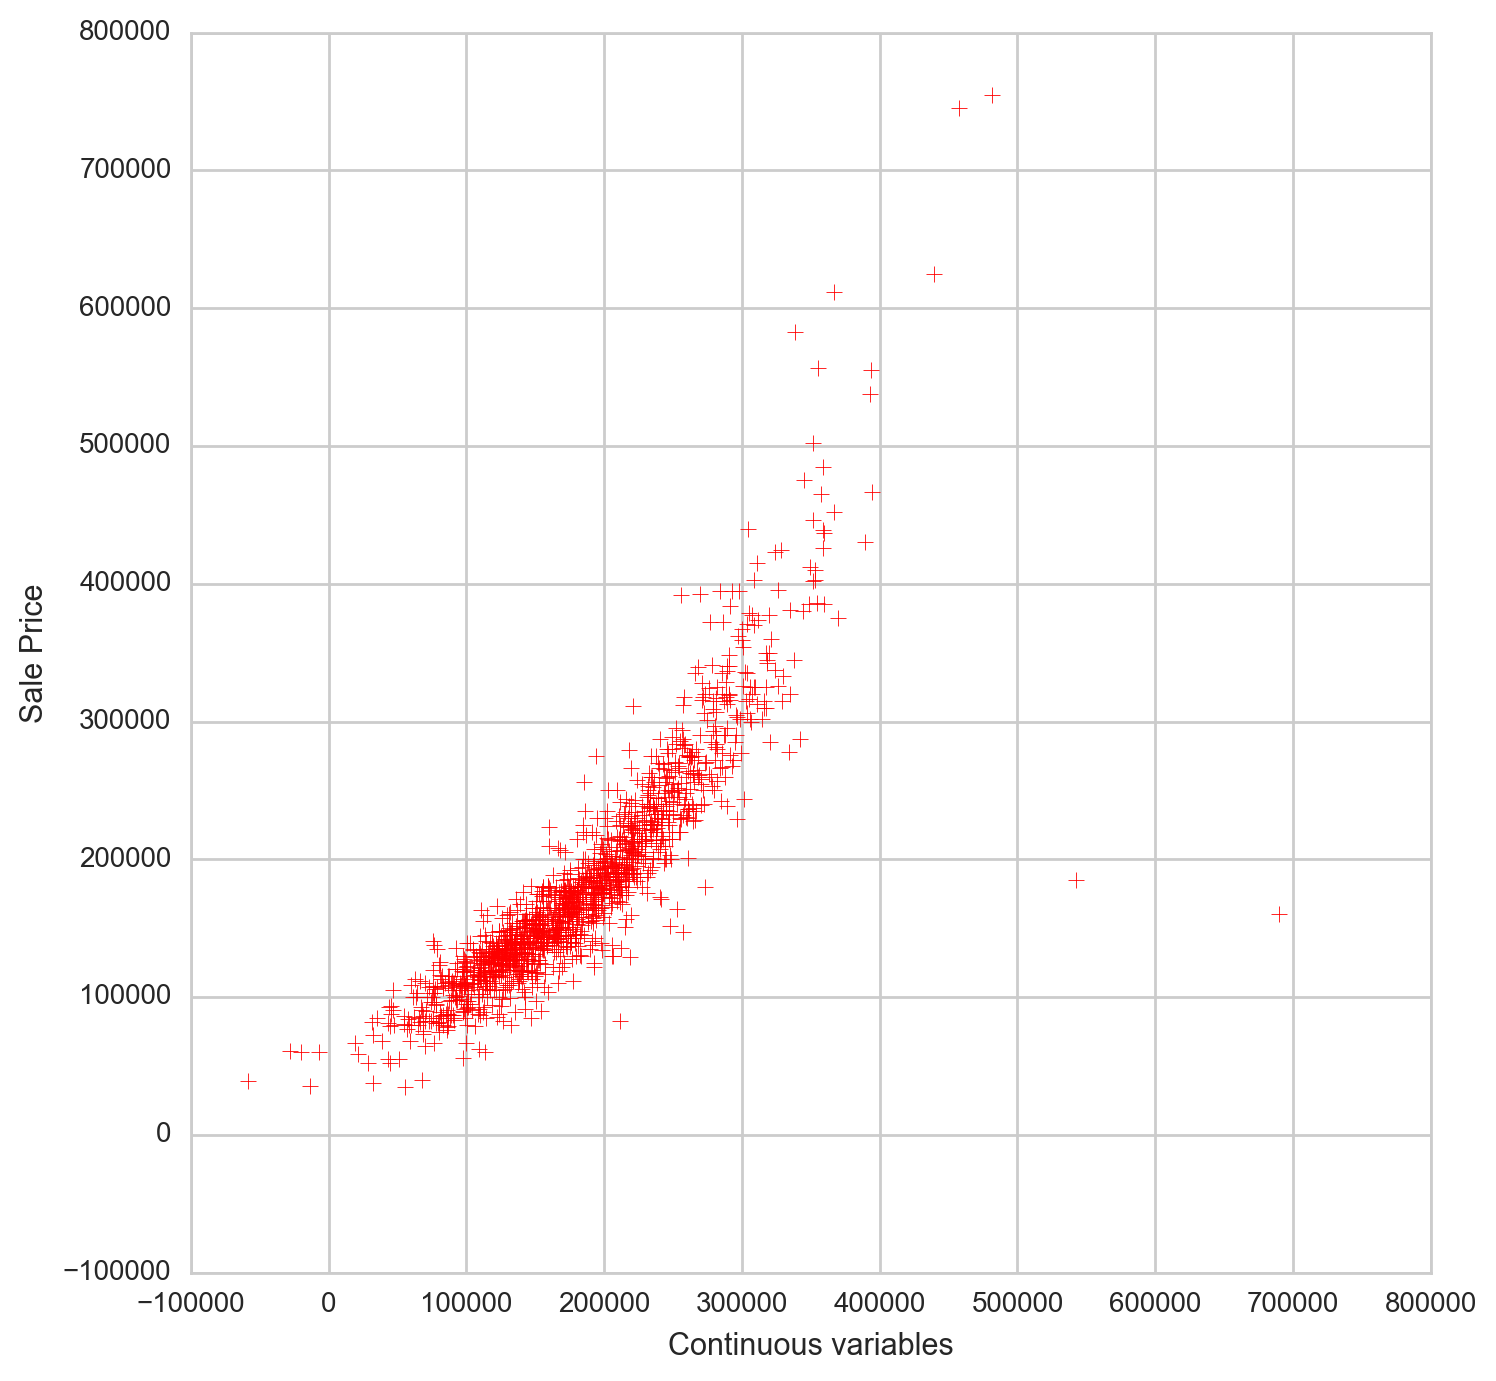

In [36]:
lm = linear_model.LinearRegression()

X = house[['LotArea','OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtHalfBath', 'BsmtUnfSF', 
           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 
           'PoolArea', 'MiscVal', 'GrLivArea', 'Age']]
y = house['SalePrice']

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Continuous variables")
plt.ylabel("Sale Price")
plt.show()

### 8.2 Calculate the $R^2$ of your model.

In [37]:
#R^2 = 0.78
print "MSE:", mean_squared_error(y, predictions)

print 

print "COEFS:", zip(X.columns, model.coef_)

print 

print "SCORE/R^2:", model.score(X, y)

MSE: 1363120900.44

COEFS: [('LotArea', 0.54654266820757869), ('OverallQual', 22267.68387743492), ('OverallCond', 5739.0111826692755), ('BsmtFinSF1', 15.562114369596145), ('BsmtFinSF2', 0.14760240459099805), ('BsmtHalfBath', -3206.5595896249133), ('BsmtUnfSF', -2.4275577400205748), ('TotalBsmtSF', 13.282159031144261), ('1stFlrSF', 28.895053362625163), ('2ndFlrSF', 15.110558469350963), ('LowQualFinSF', -12.100968006484095), ('TotRmsAbvGrd', 1531.2678037223343), ('WoodDeckSF', 30.321392723079043), ('OpenPorchSF', 7.6571435612987102), ('PoolArea', -56.395405929776643), ('MiscVal', -1.1964548135956647), ('GrLivArea', 31.904643829015185), ('Age', -478.54971762822606)]

SCORE/R^2: 0.783864500611


### 8.3 Plot the residuals against the true values.

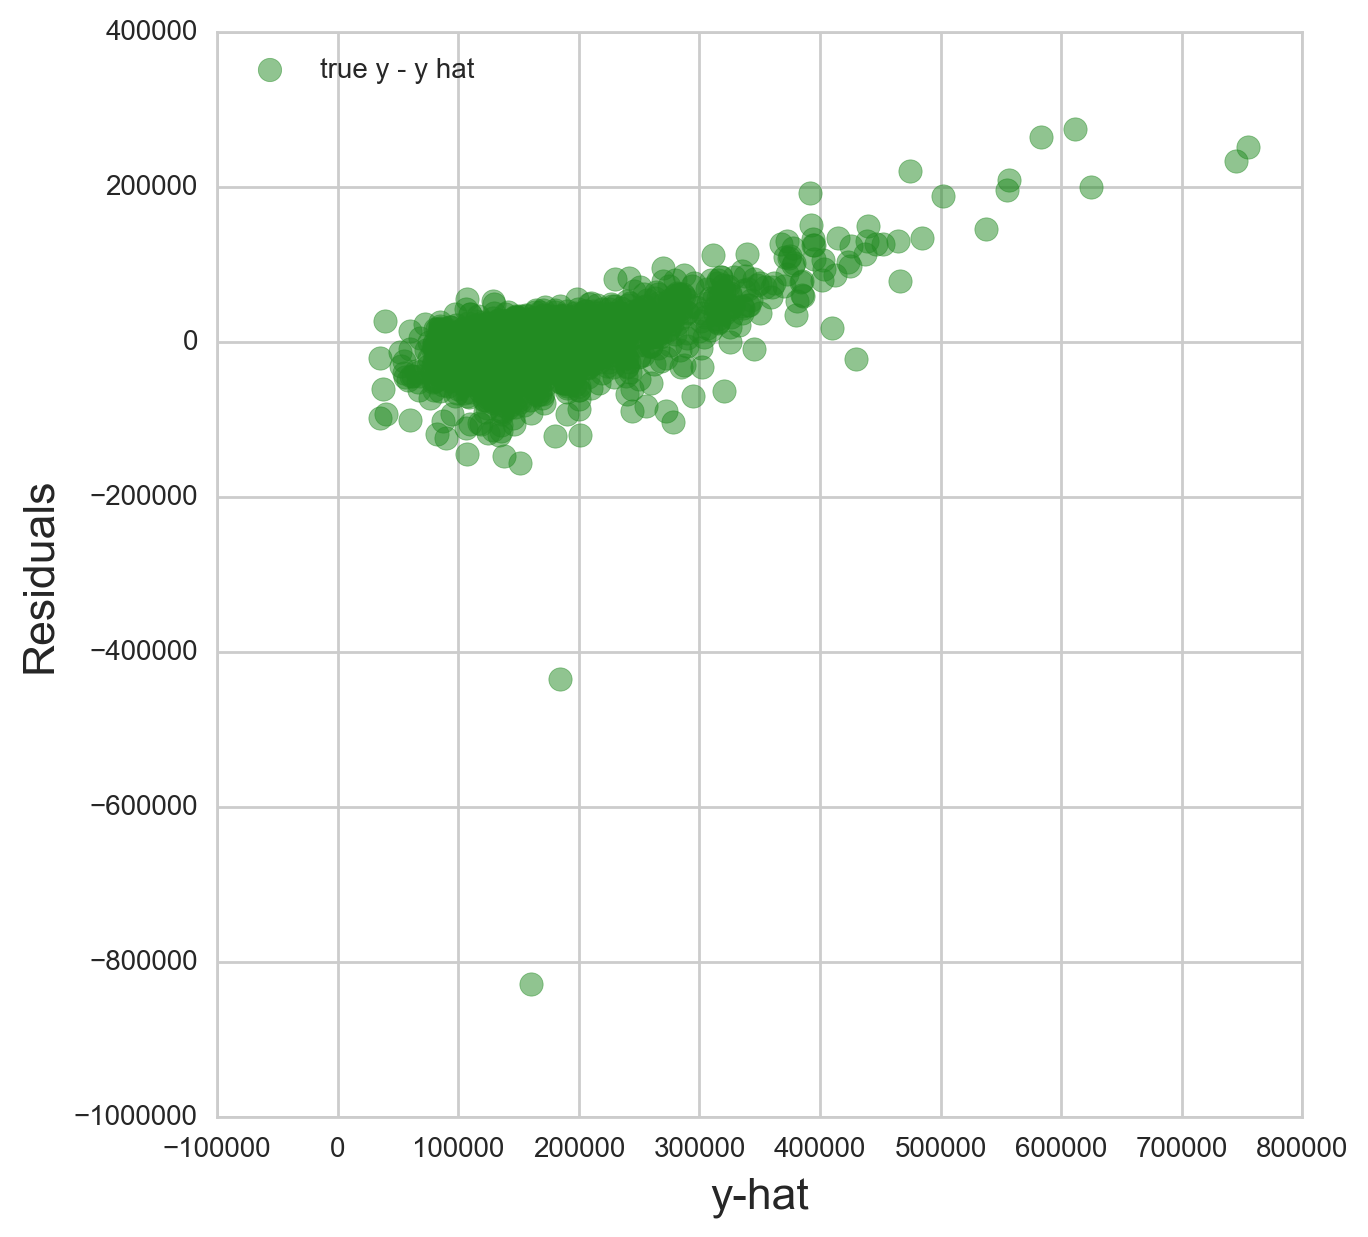

In [209]:
residuals = y - predictions

fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax.scatter(y, residuals, color='forestgreen', s=70, label='true y - y hat', alpha=.50)

max_x = np.max(y)+10

ax.set_xlabel('y-hat', fontsize=16)
ax.set_ylabel('Residuals', fontsize=16)

plt.legend(loc='upper left')

plt.show()

### 8.4 Plot a histogram of the residuals.

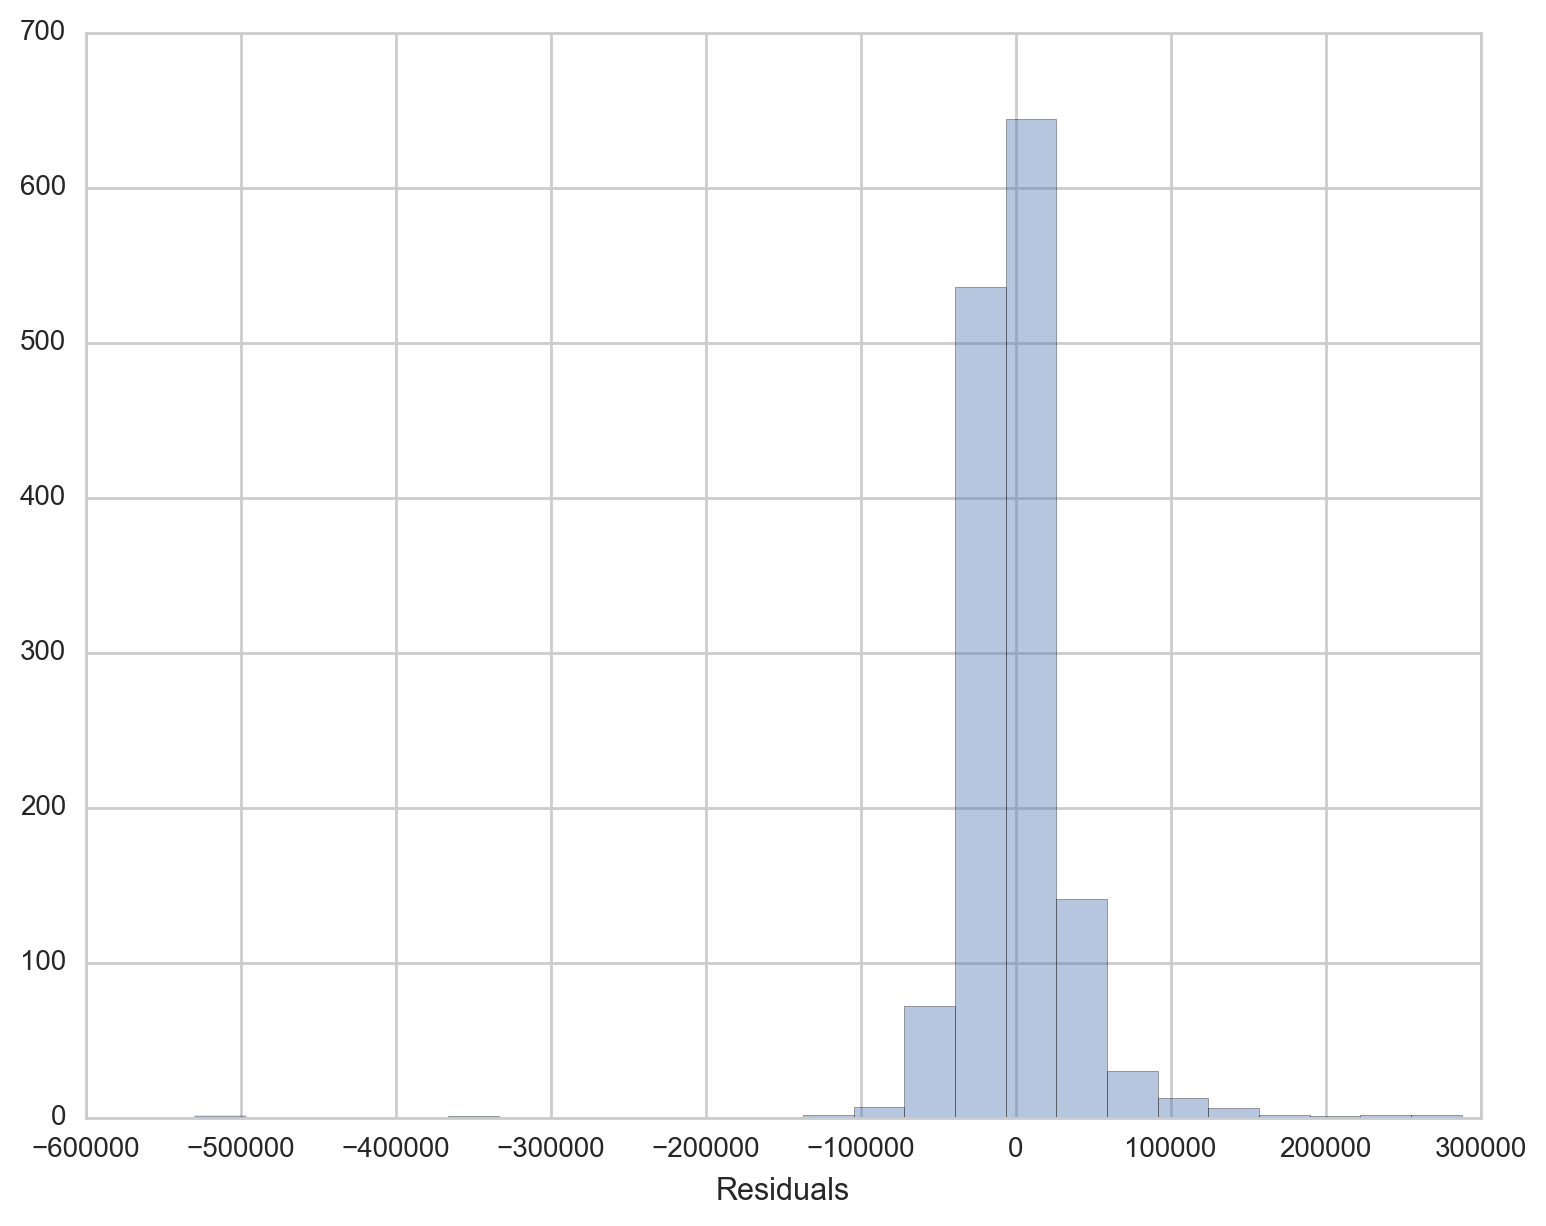

In [39]:
residuals = y - predictions
sns.distplot(residuals, bins=25, kde=False, axlabel='Residuals', vertical=False)

### 8.5 Make a plot to show the strength of the different coefficients.

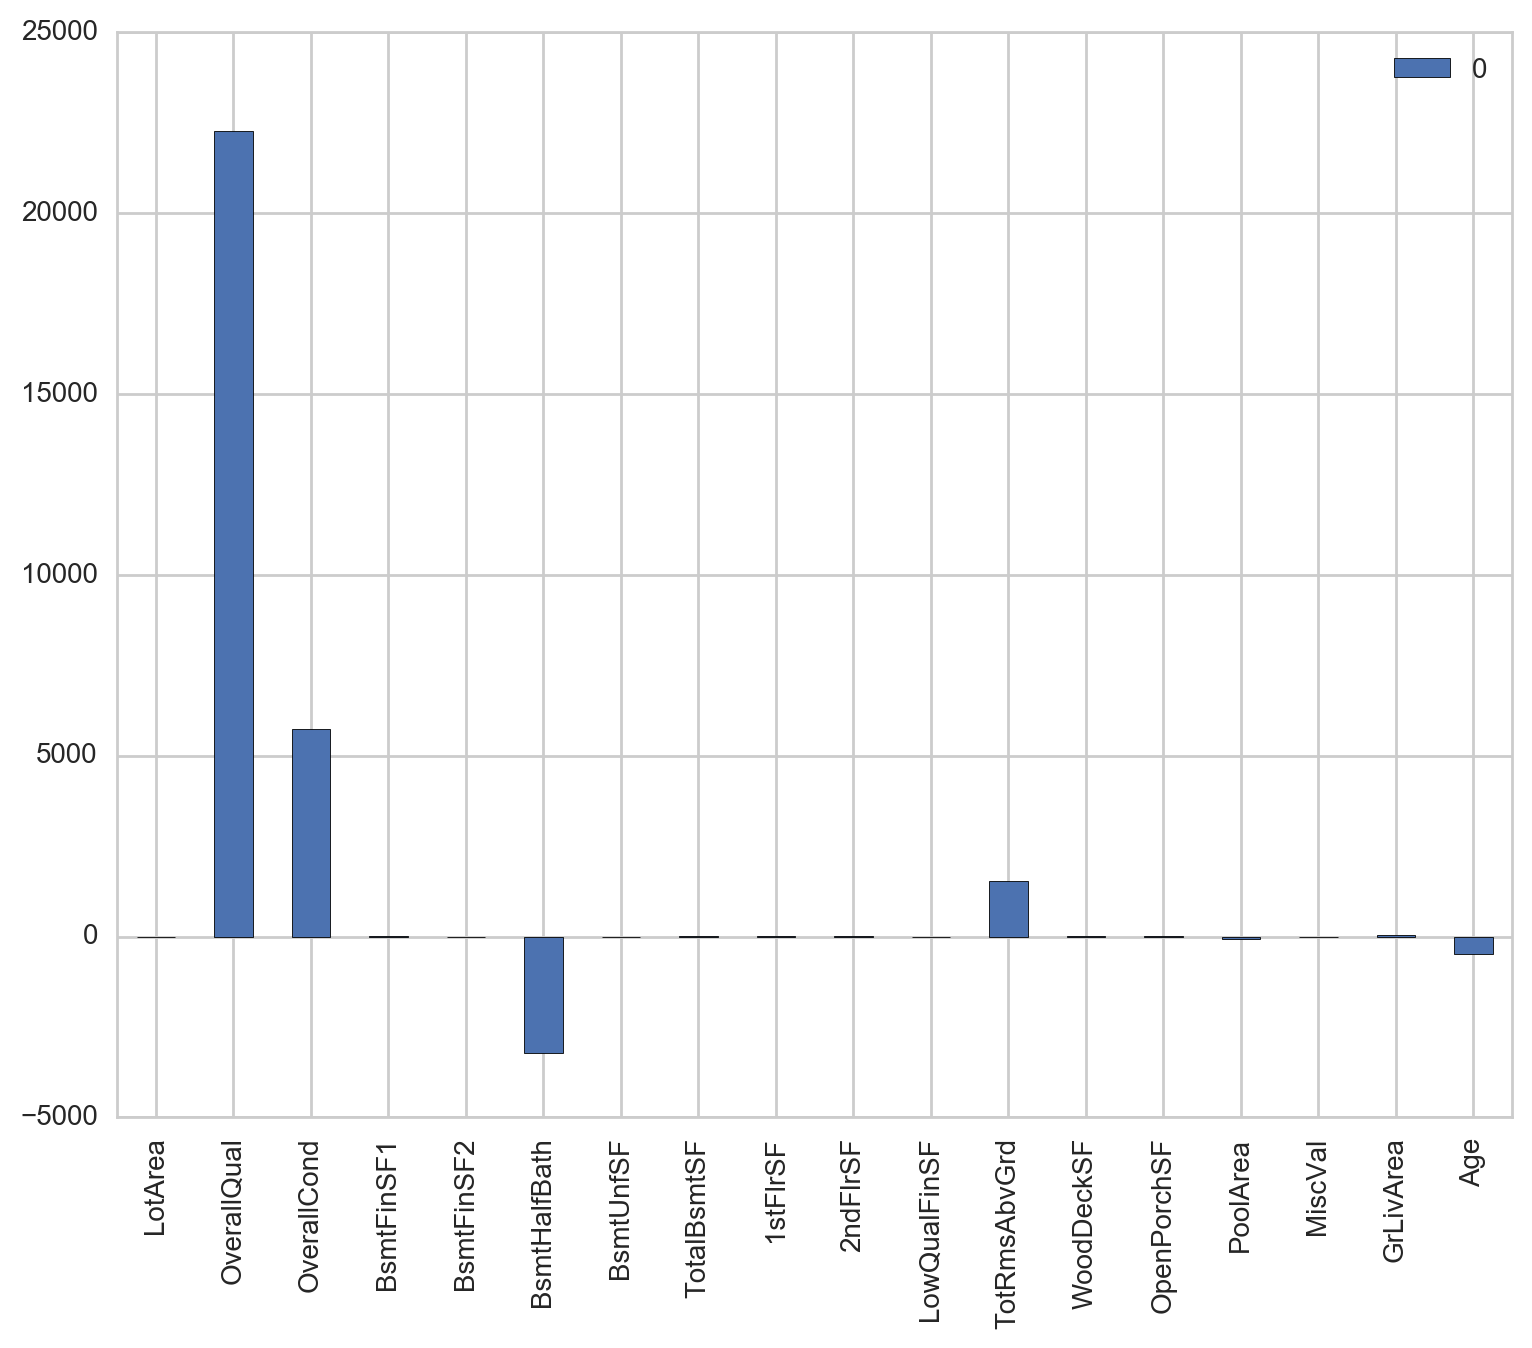

In [40]:
strength = pd.DataFrame(model.coef_)
strength.index = X.columns
strength.plot(kind="bar")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [131]:
import seaborn as sns, pandas as pd
import numpy as np
import patsy
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

In [132]:
import patsy
dummy  =  "SalePrice ~ LotArea + OverallQual + OverallCond + BsmtFinSF1 + BsmtFinSF2 + BsmtHalfBath + \
BsmtUnfSF + TotalBsmtSF + LowQualFinSF + TotRmsAbvGrd + WoodDeckSF +OpenPorchSF + PoolArea + \
MiscVal + GrLivArea + Age + MSZoning + Street +LotShape + LandContour + Utilities + LotConfig + LandSlope + \
Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + \
ExterQual + ExterCond + Foundation + Heating + HeatingQC + CentralAir + \
KitchenQual + Functional + PavedDrive + SaleType + SaleCondition - 1"

y, X = patsy.dmatrices(dummy, data=house, return_type="dataframe")

In [133]:
X.head(5)

,MSZoning[C (all)],MSZoning[FV],MSZoning[RH],MSZoning[RL],MSZoning[RM],Street[T.Pave],LotShape[T.IR2],LotShape[T.IR3],LotShape[T.Reg],LandContour[T.HLS],...,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,GrLivArea,Age
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,150.0,856.0,0.0,8.0,0.0,61.0,0.0,0.0,1710.0,5.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,284.0,1262.0,0.0,6.0,298.0,0.0,0.0,0.0,1262.0,31.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,434.0,920.0,0.0,6.0,0.0,42.0,0.0,0.0,1786.0,7.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,540.0,756.0,0.0,7.0,0.0,35.0,0.0,0.0,1717.0,91.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,490.0,1145.0,0.0,9.0,192.0,84.0,0.0,0.0,2198.0,8.0


### 9.2 Fit a linear regression using all of the predictors and score it.

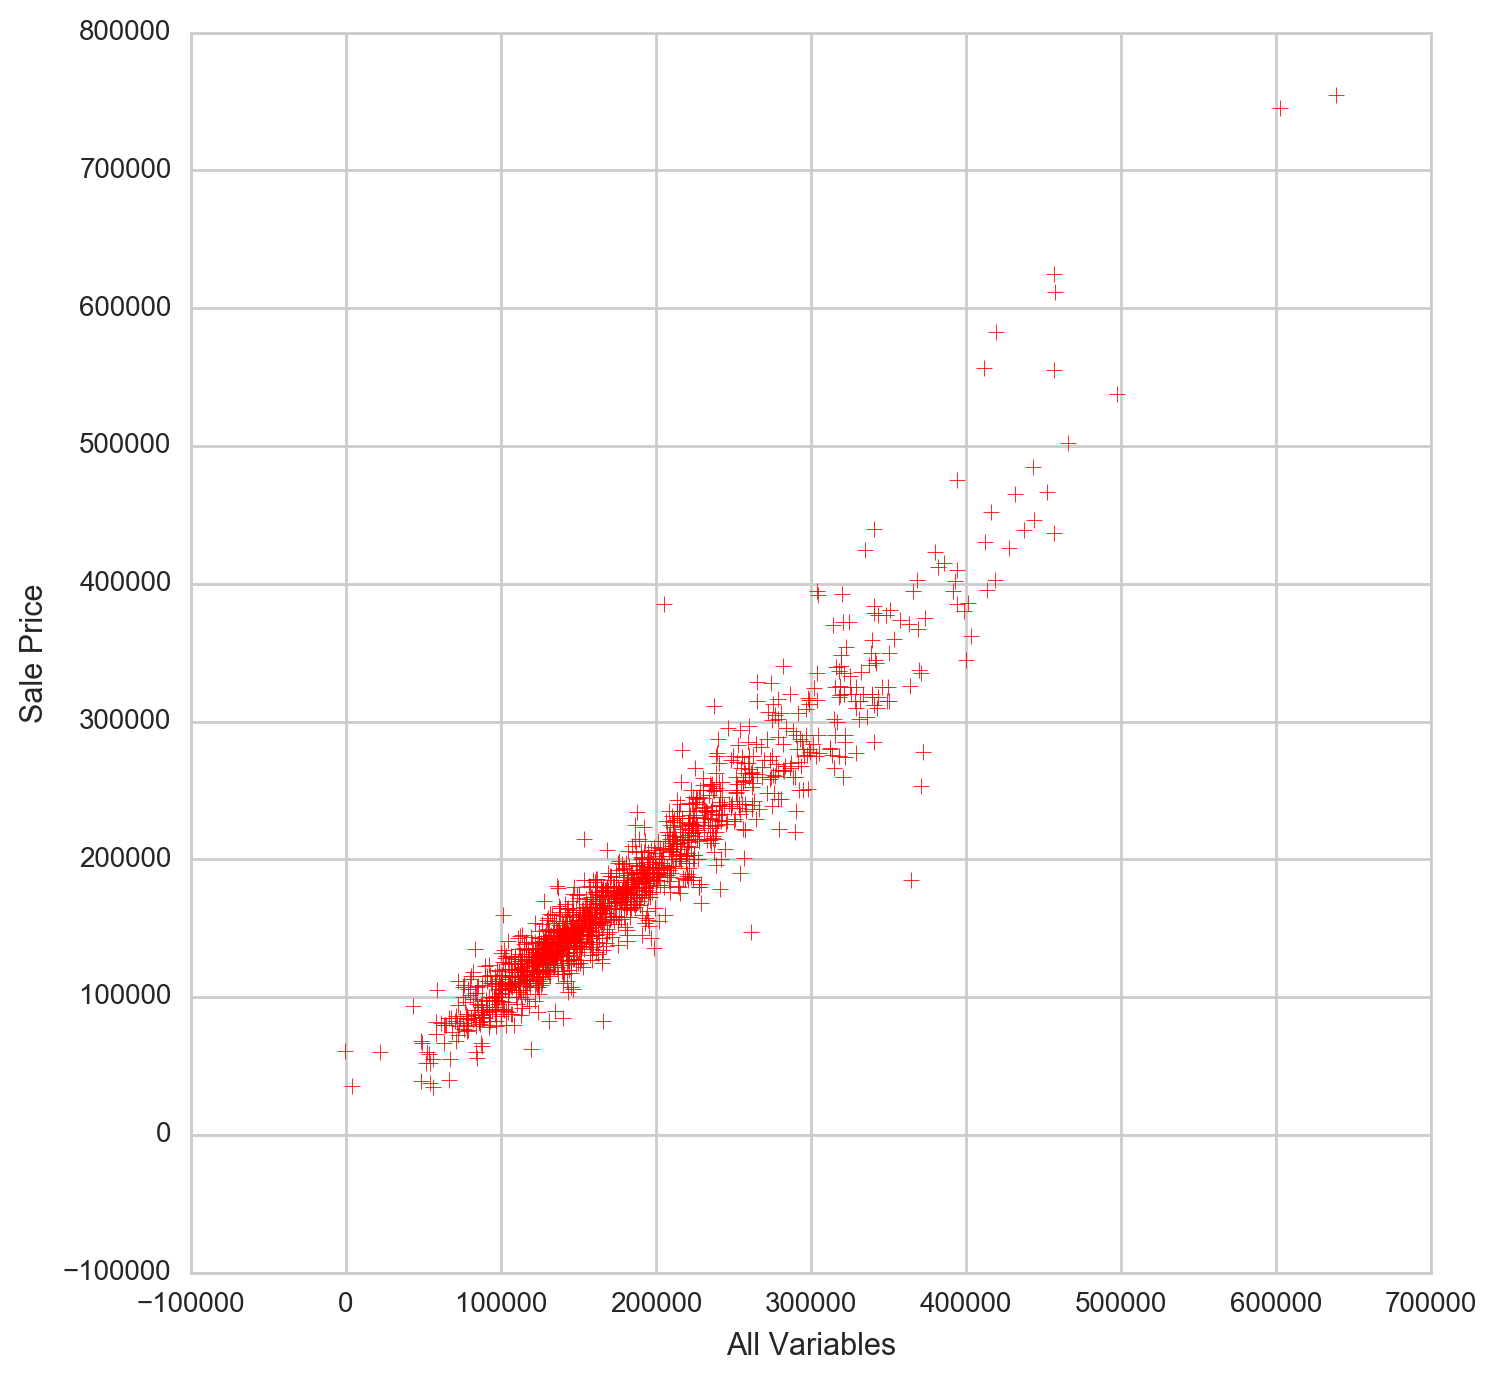

In [134]:
lm = linear_model.LinearRegression() 

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("All Variables")
plt.ylabel("Sale Price")
plt.show()

In [135]:
print "R^2:" 
score

R^2:


0.91469445369068381

### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

In [136]:
#the model and associated R^2 are not as good as they seem because we have 'over-fitted' our model, meaning that it 
#works for this particular data set, but on another set it wouldn't

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

In [137]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

Cross-validated scores: [ 0.71263017  0.5470757   0.64893135  0.74128349  0.74736718  0.7228294
  0.73772388  0.30673814  0.76494323  0.73411412  0.76842008  0.60925503
  0.59459999  0.7046318   0.62479376  0.70754222  0.70401667 -1.03797296
  0.78860173  0.63547337]
Cross-Predicted Accuracy: 0.612452999554


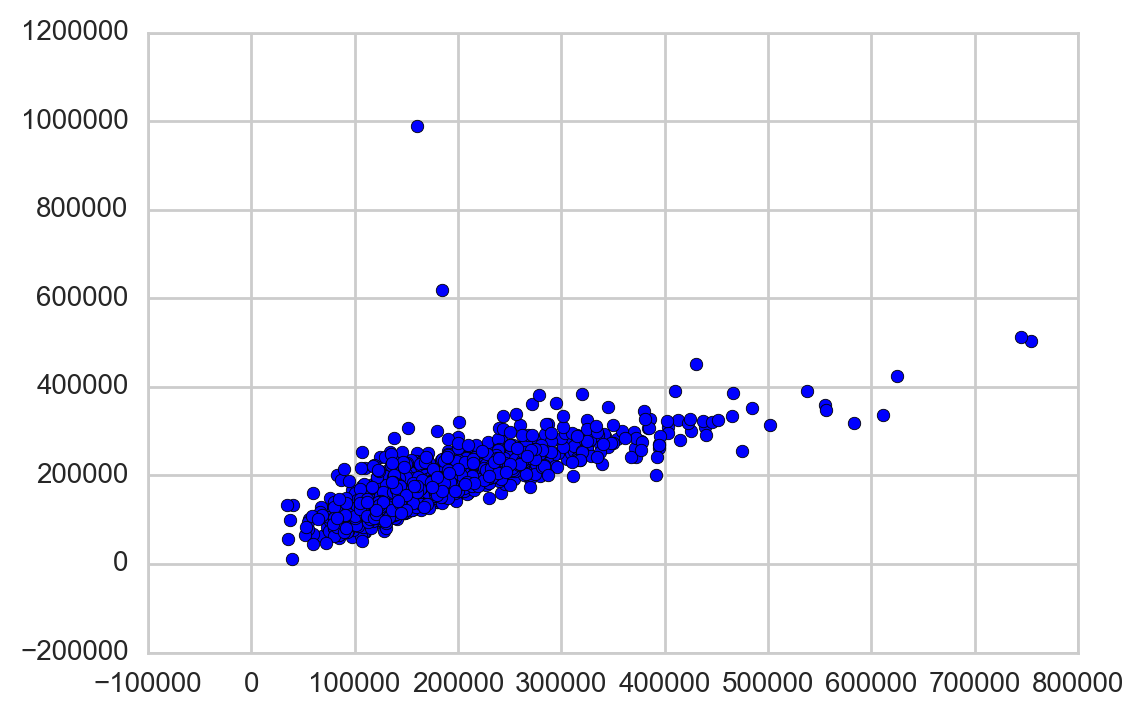

In [208]:
scores = cross_val_score(model, X, y, cv=20)
print "Cross-validated scores:", scores

predictions = cross_val_predict(model, X, y, cv=20)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy


### 10.2 What does the cross-validated average $R^2$ tell you?

In [ ]:
#the R^2 has been reduced from 0.91 to 0.61. This means that the model isn't as over-fitted as we expected it to be

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


In [82]:
#when the fit of two variables is worse than just fitting a horizontal line (predicting the mean)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [152]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xn = ss.fit_transform(X)

In [121]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, y)

print optimal_lasso.alpha_

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

791.172017472


..............................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished


### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [122]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.91066334  0.89908867  0.90450228  0.77308795  0.86745106  0.77009149
  0.85912287  0.83078369  0.56082184  0.87462732]
0.82502405001


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

In [210]:
#when we run Lasso regularization, we find the optimal alpha value which we then use to perform our cross validation
#testing. This is useful when there is multicollinearity in our data. Using Lasso helps mitigate the effects of when  
#there are high correlations between predictor variables in our data

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

In [123]:
lasso.fit(Xn, y)

Lasso(alpha=791.17201747192348, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
lasso_coefs.head()

,abs_coef,coef,variable
170,28453.251645,28453.251645,GrLivArea
157,19738.220775,19738.220775,OverallQual
34,10527.638961,10527.638961,Neighborhood[T.NridgHt]
134,10337.971320,-10337.971320,KitchenQual[T.TA]
171,10224.013052,-10224.013052,Age


In [143]:
lasso_coefs = pd.DataFrame({'variable': X.columns,
                           'coef': lasso.coef_,
                           'abs_coef': np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace= True, ascending=False)
no_zero_lasso = lasso_coefs[lasso_coefs['abs_coef'] > 0]
print no_zero_lasso.head(5)
print 
print no_zero_lasso.count()

         abs_coef          coef                 variable
170  28453.251645  28453.251645                GrLivArea
157  19738.220775  19738.220775              OverallQual
34   10527.638961  10527.638961  Neighborhood[T.NridgHt]
134  10337.971320 -10337.971320        KitchenQual[T.TA]
171  10224.013052 -10224.013052                      Age

abs_coef    87
coef        87
variable    87
dtype: int64


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

In [160]:
dummy2  =  "SalePrice ~  BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + LowQualFinSF + WoodDeckSF +OpenPorchSF + GrLivArea  - 1"

y, X =  patsy.dmatrices(dummy2, data=house, return_type="dataframe")

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

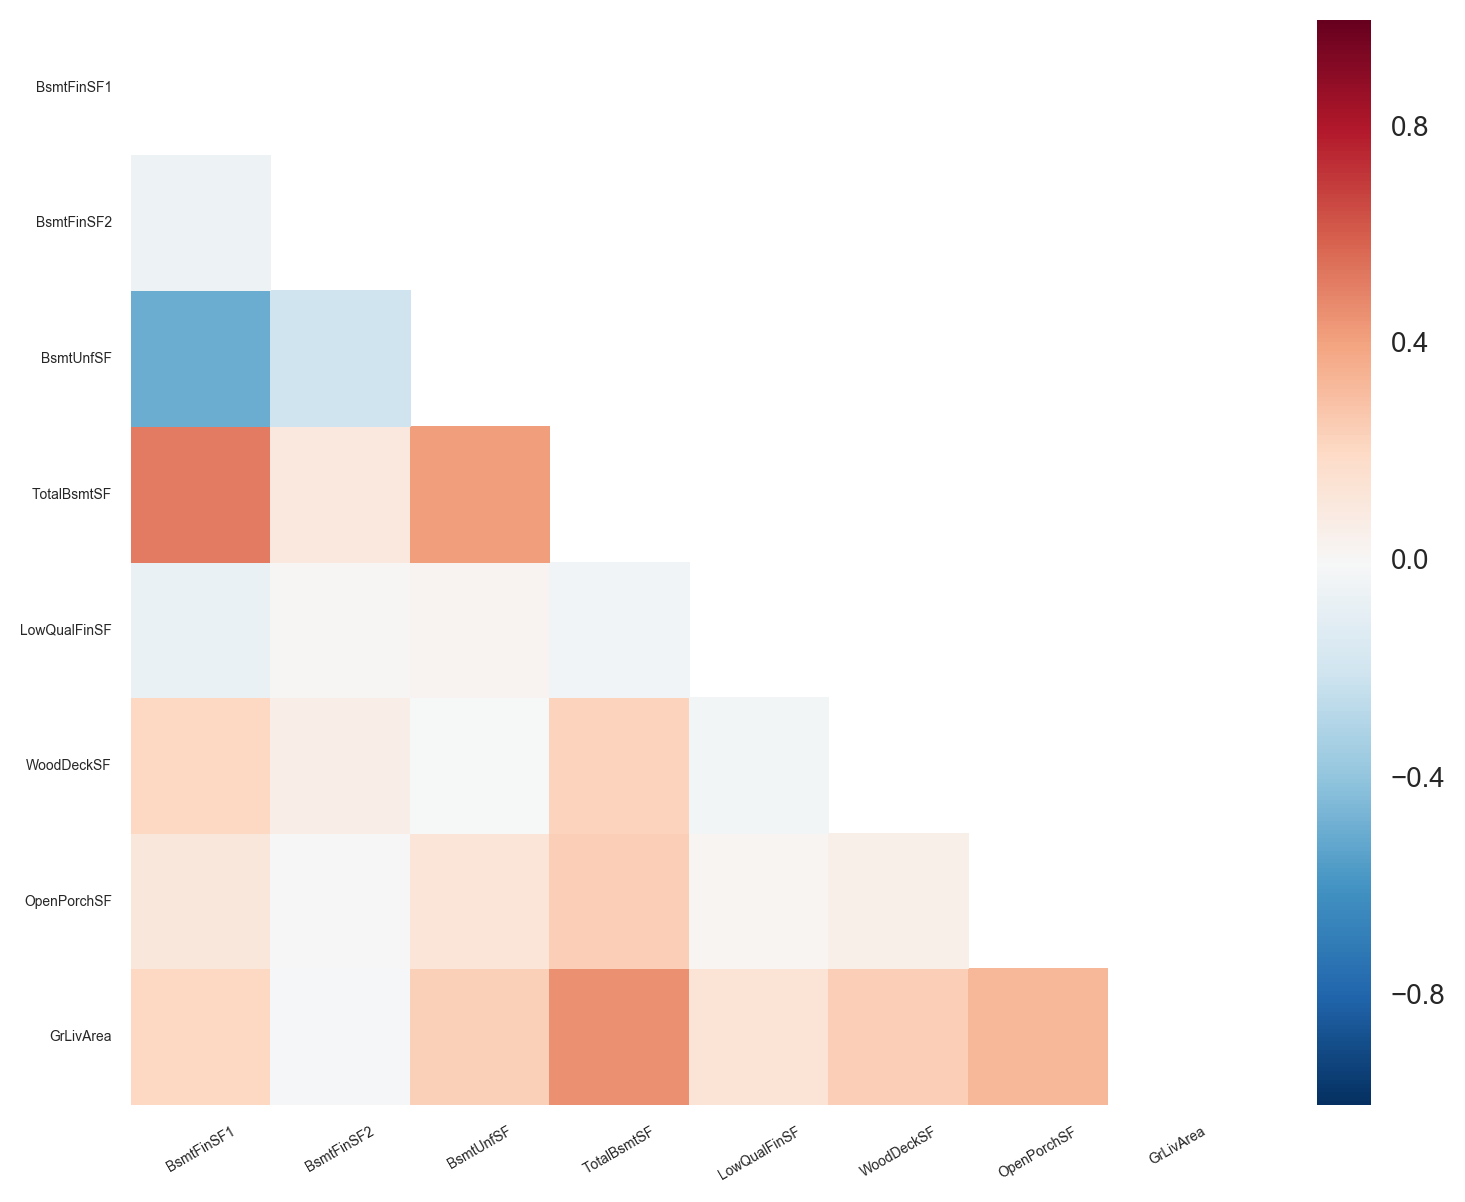

In [161]:
def correlation_heat_map(df):
    corrs = X.corr()
    plt.rcParams['figure.figsize']=(9,7)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=False)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=5, rotation=0)
    plt.show()
    
correlation_heat_map(X)

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



In [162]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)

print optimal_ridge.alpha_

100000.0


### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

In [163]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[ 0.66278353  0.68390567  0.74371925  0.56502326  0.74093278  0.69917922
  0.63741558  0.65575541  0.15018987  0.72010745]
0.625901201707


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

In [ ]:
#Ridge regression takes the sum of the squared (non-intercept) beta values, where as the Lasso regression takes the 
#sum of the absolute values of the beta values.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

In [212]:
from sklearn import grid_search, datasets
from sklearn.linear_model import LinearRegression
import pandas as pd, patsy

In [214]:
search_parameters = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

lm = LinearRegression()

estimator = grid_search.GridSearchCV(lm, search_parameters, cv=5)

results = estimator.fit(X, y)

print "Best Score:"
print results.best_score_

print

print "Best Params:"
print results.best_params_

Best Score:
0.622442616696

Best Params:
{'normalize': False, 'fit_intercept': False}


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**